# Sample Dataset Statistical Analysis (UNCLEANED)
Copyright (C) 2021 ServiceNow, Inc.

This notebook provides the raw analysis done on the Sample NRCan Dataset. It is provided for reference. 

In [2]:
import pandas as pd

sample_files = pd.read_csv('sample_files.csv', index_col=0)
sample_files.head()

,files,ext,stem
0,bu_003.pdf,.pdf,bu_003
1,bu_506.pdf,.pdf,bu_506
2,bu_588.zip,.zip,bu_588
3,cr_1994_a.pdf,.pdf,cr_1994_a
4,cr_2000_c20.pdf,.pdf,cr_2000_c20


In [1]:
import pathlib
import pandas as pd

TXT_DIR = "/home/stefania/Downloads/NRCAN zips/"
PDF_DIR = "/home/stefania/Downloads/NRCan zips raw"

p_txt = pathlib.Path(TXT_DIR)
p_pdf = pathlib.Path(PDF_DIR)

pdfs = [x for x in p_pdf.glob("**/*.pdf")]
print(len(pdfs))

csvs = [x for x in p_txt.glob("**/*.csv")]
print(len(csvs))


203
203


In [31]:
import pandas as pd

df = pd.read_csv('sample_stats_v1.csv', index_col=[0])

In [32]:
df.head()

,obj_type,pg,pos_x0,pos_y0,pos_x1,pos_y1,text,file
Unnamed: 0,,,,,,,,
0,<class 'pdfminer.layout.LTTextBoxHorizontal'>,0,90.000000,708.58578,153.374060,718.60578,Sample 3034 \n,/home/stefania/Downloads/NRCAN zips/of_7196__D...
1,<class 'pdfminer.layout.LTTextBoxHorizontal'>,0,97.796562,685.66588,201.177384,695.68588,uartz: Anhedral grains \n,/home/stefania/Downloads/NRCAN zips/of_7196__D...
2,<class 'pdfminer.layout.LTTextBoxHorizontal'>,0,96.682338,662.62578,272.820260,672.64578,"lagioclase Anhedral Grains, untwinned. \n",/home/stefania/Downloads/NRCAN zips/of_7196__D...
3,<class 'pdfminer.layout.LTTextBoxHorizontal'>,0,96.683340,639.64578,501.758564,649.66578,iotite: dark red-brown to dirty yellow pleochr...,/home/stefania/Downloads/NRCAN zips/of_7196__D...
4,<class 'pdfminer.layout.LTTextBoxHorizontal'>,0,90.000000,628.12578,286.721296,638.14578,aligned internal to cordierite porphyroblasts. \n,/home/stefania/Downloads/NRCAN zips/of_7196__D...


# Overall Statistics

In [61]:
df['width'] = df.pos_x1 - df.pos_x0
df['height'] = df.pos_y1 - df.pos_y0
df['nwords'] = df.text.str.split().str.len()
df['nwords_stripped'] = df.text.str.strip().str.split().str.len()

In [35]:
#df['id'] = df.file.str.split("/").str[-1].str.split('.').str[0].str.split('_').str[0:2].str.join('_') # change to double dash
df['id'] = df.file.str.split("/").str[-1].str.split('.').str[0].str.split('__').str[0]
#df.loc[df['id'] == "of_7196 (2)_Digital Supplement 2 -  Surficial Geology_Surficial Map MERA compilation", ""] = "of_7196"
df.head()

,obj_type,pg,pos_x0,pos_y0,pos_x1,pos_y1,text,file,width,height,nwords,id
Unnamed: 0,,,,,,,,,,,,
0,<class 'pdfminer.layout.LTTextBoxHorizontal'>,0,90.000000,708.58578,153.374060,718.60578,Sample 3034 \n,/home/stefania/Downloads/NRCAN zips/of_7196__D...,63.374060,10.02,2.0,of_7196
1,<class 'pdfminer.layout.LTTextBoxHorizontal'>,0,97.796562,685.66588,201.177384,695.68588,uartz: Anhedral grains \n,/home/stefania/Downloads/NRCAN zips/of_7196__D...,103.380822,10.02,3.0,of_7196
2,<class 'pdfminer.layout.LTTextBoxHorizontal'>,0,96.682338,662.62578,272.820260,672.64578,"lagioclase Anhedral Grains, untwinned. \n",/home/stefania/Downloads/NRCAN zips/of_7196__D...,176.137922,10.02,4.0,of_7196
3,<class 'pdfminer.layout.LTTextBoxHorizontal'>,0,96.683340,639.64578,501.758564,649.66578,iotite: dark red-brown to dirty yellow pleochr...,/home/stefania/Downloads/NRCAN zips/of_7196__D...,405.075224,10.02,13.0,of_7196
4,<class 'pdfminer.layout.LTTextBoxHorizontal'>,0,90.000000,628.12578,286.721296,638.14578,aligned internal to cordierite porphyroblasts. \n,/home/stefania/Downloads/NRCAN zips/of_7196__D...,196.721296,10.02,5.0,of_7196


In [39]:
df.loc[df['id'] == "of_7196 (2)_Digital Supplement 2 -  Surficial Geology_Surficial Map MERA compilation", "id"] = "of_7196"

In [53]:
df.loc[df.file.str.contains("of_7196 (2)_Digital Supplement 2", regex=False), "file"]  = df[df.file.str.contains("of_7196 (2)_Digital Supplement 2", regex=False)].file.str.replace('of_7196 (2)_', "of_7196__", regex=False)

In [263]:
#df.loc[df.file.str.contains('sum_rep'), 'id'] = df[df.file.str.contains('sum_rep')].file.str.split("/").str[-1].str.split('.').str[0].str.split('_').str[0:4].str.join('_')

In [62]:
df.head()

,obj_type,pg,pos_x0,pos_y0,pos_x1,pos_y1,text,file,width,height,nwords,id,nwords_stripped
Unnamed: 0,,,,,,,,,,,,,
0,<class 'pdfminer.layout.LTTextBoxHorizontal'>,0,90.000000,708.58578,153.374060,718.60578,Sample 3034 \n,/home/stefania/Downloads/NRCAN zips/of_7196__D...,63.374060,10.02,2.0,of_7196,2.0
1,<class 'pdfminer.layout.LTTextBoxHorizontal'>,0,97.796562,685.66588,201.177384,695.68588,uartz: Anhedral grains \n,/home/stefania/Downloads/NRCAN zips/of_7196__D...,103.380822,10.02,3.0,of_7196,3.0
2,<class 'pdfminer.layout.LTTextBoxHorizontal'>,0,96.682338,662.62578,272.820260,672.64578,"lagioclase Anhedral Grains, untwinned. \n",/home/stefania/Downloads/NRCAN zips/of_7196__D...,176.137922,10.02,4.0,of_7196,4.0
3,<class 'pdfminer.layout.LTTextBoxHorizontal'>,0,96.683340,639.64578,501.758564,649.66578,iotite: dark red-brown to dirty yellow pleochr...,/home/stefania/Downloads/NRCAN zips/of_7196__D...,405.075224,10.02,13.0,of_7196,13.0
4,<class 'pdfminer.layout.LTTextBoxHorizontal'>,0,90.000000,628.12578,286.721296,638.14578,aligned internal to cordierite porphyroblasts. \n,/home/stefania/Downloads/NRCAN zips/of_7196__D...,196.721296,10.02,5.0,of_7196,5.0


In [11]:
#df.to_csv('sample_stats_v1_ext_1.csv')
import pandas as pd

df = pd.read_csv('sample_stats_v1_ext_1.csv', index_col=[0])

/home/stefania/Projects/ve/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/stefania/Projects/ve/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


## Average number of pdfs per GEOSCAN entry

In [266]:
df.id.describe()

count     3711150
unique         51
top       of_7196
freq      2301406
Name: id, dtype: object

In [58]:
v = df[['file', 'id']].groupby(['id']).file.nunique()#count()#.groupby('id').sum.plot()
v.describe().to_frame()

,file
count,51.000000
mean,3.980392
std,13.382810
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,92.000000


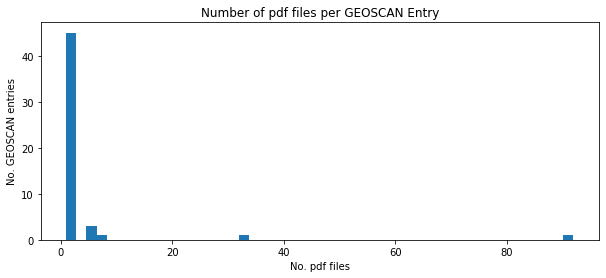

In [60]:
import matplotlib.pyplot as plt
v.plot.hist(bins=50, figsize=(10,4))
plt.xlabel('No. pdf files')
plt.ylabel('No. GEOSCAN entries')
plt.title('Number of pdf files per GEOSCAN Entry')
plt.show()

**Analysis**: 
The number of pdf files varies wildly for a given geoscan entry.

## Average number of pages per pdf overall

In [65]:
v = df[['file', 'pg']].groupby(['file']).pg.nunique()#count()#.groupby('id').sum.plot()
v.describe().to_frame()

,pg
count,203.000000
mean,27.266010
std,78.925884
min,1.000000
25%,1.000000
50%,2.000000
75%,20.500000
max,669.000000


Text(0.5, 1.0, 'Number of pages per pdf')

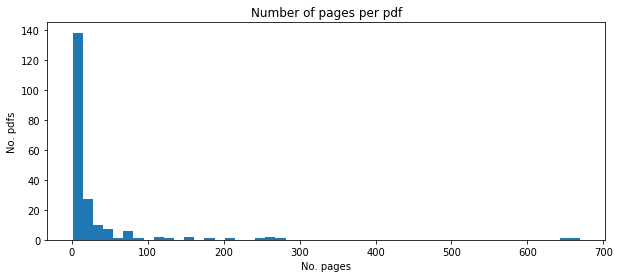

In [66]:
import matplotlib.pyplot as plt
v.plot.hist(bins=50, figsize=(10,4))
plt.xlabel('No. pages')
plt.ylabel('No. pdfs')
plt.title('Number of pages per pdf')

**Analysis**:
The number of pages varies wildly across pdfs. There are many single page pdfs.

## Average number of pages per pdf per GEOSCAN document

In [67]:
v = df[['id','file', 'pg']].groupby(['id', 'file']).pg.nunique().to_frame().groupby('id').pg.agg(['mean', 'min', 'max', 'median', 'count']) #mean()#.unstack().groupby(['file', 'pg'#.unstack()# .count()#
display(v) # groupby(['file']).pg.nunique()#count()#.groupby('id').sum.plot()
#v.describe().to_frame()

,mean,min,max,median,count
id,,,,,
bu_003,85.000000,85,85,85.0,1
bu_506,272.000000,272,272,272.0,1
bu_588,19.363636,2,48,20.0,33
cr_1994_a,251.000000,251,251,251.0,1
cr_2000_c20,10.000000,10,10,10.0,1
cr_2019_03_gsc,18.000000,18,18,18.0,1
do_pub_14_11,24.000000,24,24,24.0,1
do_ss_1969_4,20.000000,20,20,20.0,1
ebp_2002_2005_f,39.000000,39,39,39.0,1


Text(0.5, 0.98, 'No. pg per pdf for each GEOSCAN entry')

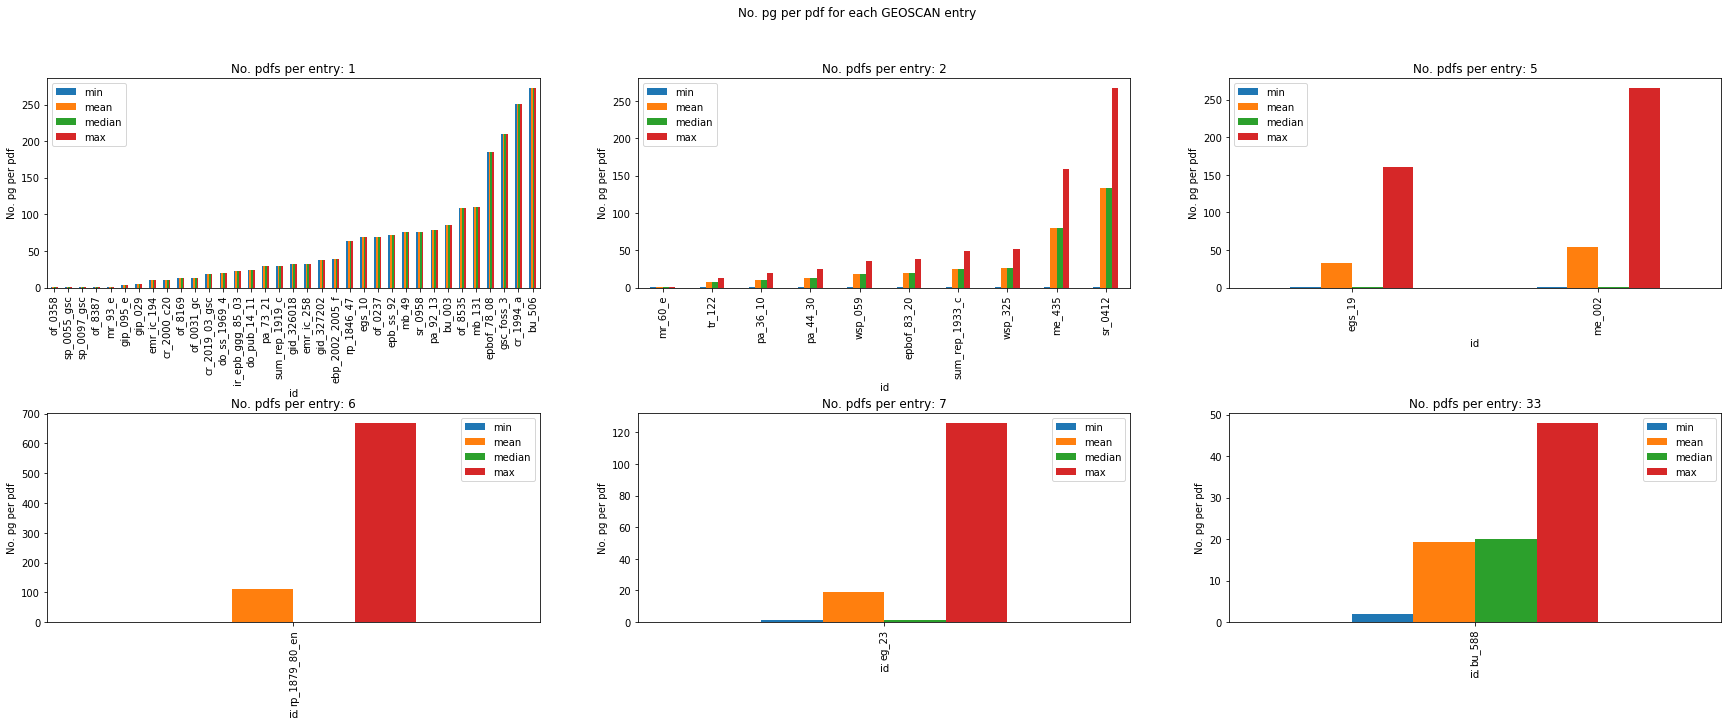

In [68]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2,3, figsize=(30,10),gridspec_kw=dict(hspace=0.6) )
for (gname, group), ax in zip(v.sort_values('mean').groupby('count'), axes.flatten()):
    #v.sort_values('mean').groupby('count').plot(kind='bar', figsize=(20,5), logy=False) #subplots=True)
    group[['min', 'mean', 'median', 'max']].plot.bar(title=f"No. pdfs per entry: {gname}", ax=ax)
    ax.set_ylabel("No. pg per pdf")

fig.suptitle('No. pg per pdf for each GEOSCAN entry')

**Analysis**: 
The size of pdfs varies drastically within a GEOSCAN entry. E.g. There are entries which contain one very long pdf and many shorter pdfs, but some contain many longer pdfs. 

**Conclusion**: 
Should not try to forcibly limit each entry to 1 pdf.

# Metadata extraction

In [71]:
metadata = pd.read_csv('/home/stefania/Downloads/EAITest.xml_df.csv')
metadata.head()

,Unnamed: 0,dc:contributor,dc:coverage,dc:coverage_en,dc:coverage_fr,dc:creator,dc:date,dc:description_en,dc:description_fr,dc:format,...,dc:publisher_fr,dc:rights_en,dc:rights_fr,dc:source_en,dc:source_fr,dc:subject_en,dc:subject_fr,dc:title_en,dc:title_fr,dc:type_en
0,0,['GEOSCAN'],"['POLYGON((41.7500 -83.0000, 49.0000 -95.0000,...","['British Columbia', 'Alberta', 'Saskatchewan'...","['Colombie-Britannique', 'Alberta', 'Saskatche...","['Halliday, R J']",['1970'],[None],[None],"['pdf', 'Open Access']",...,NaN,['https://open.canada.ca/en/open-government-li...,['https://ouvert.canada.ca/fr/licence-du-gouve...,['Seismological Series of the Dominion Observa...,['Seismological Series of the Dominion Observa...,"['nuclear explosions, undergrd', 'Rulison Expl...","['explosions nucléaires souterraines', 'géophy...",['Canadian seismic data for Project Rulison'],NaN,['Report']
1,1,['GEOSCAN'],"['POLYGON((43.0000 -58.0000, 43.0000 -68.0000,...","['Nova Scotia', 'New Brunswick']","['Nouvelle-Écosse', 'Nouveau-Brunswick']",['John A. Leslie and Associates Limited'],['1983'],['Data pertinent to the assessment of the geot...,"[""L'auteur a reassemblé et groupé des données ...","['pdf', 'JPEG2000', 'Open Access']",...,"['Énergie, Mines et Ressources Canada']",NaN,NaN,"['Earth Physics Branch, Open File 83-20, 32 pa...","['Direction de la physique du globe, Dossier p...","['geothermal energy', 'geothermal resources', ...","['énergie géothermique', 'ressources géothermi...",['Investigation of geothermal energy resources...,NaN,['Report']
2,2,['GEOSCAN'],"['POLYGON((68.0000 -80.0000, 68.0000 -88.0000,...","['Northern Canadian Cordillera', 'Sloan River ...","['Yukon', 'Territoires du Nord-Ouest', 'Nunavut']","['Abbott, G', 'Gordey, S P', 'Read, B', 'Tempe...",['1974'],[None],[None],"['pdf', 'Open Access']",...,NaN,['https://open.canada.ca/en/open-government-li...,['https://ouvert.canada.ca/fr/licence-du-gouve...,"['Geological Survey of Canada, Open File 237, ...","['Commission géologique du Canada, Dossier pub...","['lead', 'zinc', 'mineral deposits', 'volcanis...","['plomb', 'zinc', 'gisements minéraux', 'volca...",['Short papers containing results of economic ...,NaN,['Report']
3,3,['GEOSCAN'],"['POLYGON((58.2500 -102.7500, 58.2500 -103.750...",['Saskatchewan'],['Saskatchewan'],"['Chandler, F W', 'Mukherji, K K']",['1976'],[None],[None],"['pdf', 'Open Access']",...,NaN,['https://open.canada.ca/en/open-government-li...,['https://ouvert.canada.ca/fr/licence-du-gouve...,"['Geological Survey of Canada, Open File 358, ...","['Commission géologique du Canada, Dossier pub...","['amphibolites', 'iron formations', 'migmatite...","['amphibolites', 'formations ferrifères', 'mig...","['Geology of part of Wollaston lake Fold belt,...",NaN,['Map']
4,4,['GEOSCAN'],"['POLYGON((49.0000 -121.0000, 49.0000 -122.000...","['Hedley', 'British Columbia']",['Colombie-Britannique'],"['Camsell, C']",['1910'],[None],[None],"['pdf', 'Open Access']",...,NaN,['https://open.canada.ca/en/open-government-li...,['https://ouvert.canada.ca/fr/licence-du-gouve...,"['Geological Survey of Canada, Memoir no. 2, ,...","['Commission géologique du Canada, Mémoires no...","['aplites', 'arsenopyrite', 'assays', 'cobalt'...","['aplites', 'arsénopyrite', 'essais de minerai...",['Geology and ore deposits of Hedley Mining Di...,NaN,['Report']


In [79]:
v = metadata['dc:type_en'].str.extract(r'\[\'(?P<type_en>.*)\'\]')
display(v)
display(v.type_en.value_counts())

,type_en
0,Report
1,Report
2,Report
3,Map
4,Report
5,Report
6,Report
7,Report
8,Report
9,Report


Report               43
Map                   3
Internal Document     1
Abstract              1
Name: type_en, dtype: int64

In [289]:
metadata.columns

Index(['Unnamed: 0', 'dc:contributor', 'dc:coverage', 'dc:coverage_en',
       'dc:coverage_fr', 'dc:creator', 'dc:date', 'dc:description_en',
       'dc:description_fr', 'dc:format', 'dc:format_en', 'dc:format_fr',
       'dc:identifier_en', 'dc:identifier_fr', 'dc:identifier_geoscanid',
       'dc:identifier_info', 'dc:language', 'dc:publisher_en',
       'dc:publisher_fr', 'dc:rights_en', 'dc:rights_fr', 'dc:source_en',
       'dc:source_fr', 'dc:subject_en', 'dc:subject_fr', 'dc:title_en',
       'dc:title_fr', 'dc:type_en'],
      dtype='object')

In [323]:
display(metadata[metadata['dc:language'].str.contains('fr')].filter(regex='date|title|identifier_en')['dc:identifier_en'].values)
#ebp_2002_2005_f, gid_326018, gid_327202, rp_1879_80, sp_0055_gsc
metadata[metadata["dc:language"] == "['fre']"]['dc:identifier_en'].values #"#[(metadata['dc:language'] == ['fr'])].filter(regex='date|title|identifier_en')['dc:identifier_en'].values

array(["['https://geoscan.nrcan.gc.ca/starweb/geoscan/servlet.starweb?path=geoscan/fulle.web&search1=R=193615', 'http://ftp.geogratis.gc.ca/pub/nrcan_rncan/publications/ess_sst/193/193615/cr_1994_a.pdf']",
       "['https://geoscan.nrcan.gc.ca/starweb/geoscan/servlet.starweb?path=geoscan/fulle.web&search1=R=222130', 'http://ftp.geogratis.gc.ca/pub/nrcan_rncan/publications/ess_sst/222/222130/ebp_2002_2005_f.pdf']",
       "['https://geoscan.nrcan.gc.ca/starweb/geoscan/servlet.starweb?path=geoscan/fulle.web&search1=R=299839', 'http://ftp.geogratis.gc.ca/pub/nrcan_rncan/publications/ess_sst/299/299839/sp_0055_gsc.pdf']",
       "['https://geoscan.nrcan.gc.ca/starweb/geoscan/servlet.starweb?path=geoscan/fulle.web&search1=R=313334', 'http://ftp.geogratis.gc.ca/pub/nrcan_rncan/publications/ess_sst/313/313334/epb_ss_92.pdf']",
       "['https://geoscan.nrcan.gc.ca/starweb/geoscan/servlet.starweb?path=geoscan/fulle.web&search1=R=327202', 'http://ftp.geogratis.gc.ca/pub/nrcan_rncan/publications

array(["['https://geoscan.nrcan.gc.ca/starweb/geoscan/servlet.starweb?path=geoscan/fulle.web&search1=R=222130', 'http://ftp.geogratis.gc.ca/pub/nrcan_rncan/publications/ess_sst/222/222130/ebp_2002_2005_f.pdf']",
       "['https://geoscan.nrcan.gc.ca/starweb/geoscan/servlet.starweb?path=geoscan/fulle.web&search1=R=299839', 'http://ftp.geogratis.gc.ca/pub/nrcan_rncan/publications/ess_sst/299/299839/sp_0055_gsc.pdf']",
       "['https://geoscan.nrcan.gc.ca/starweb/geoscan/servlet.starweb?path=geoscan/fulle.web&search1=R=327202', 'http://ftp.geogratis.gc.ca/pub/nrcan_rncan/publications/ess_sst/327/327202/gid_327202.pdf']"],
      dtype=object)

**Analysis**:
* It's unclear from the language listed in the metadata the actual language of the pdf. The ones marked fully french are french. There are some french ones that were either listed as "en/fr" or were unidentified. There were some "en" publications that were marked en/fr.     

## The total number of types of boxes per page

In [82]:
df.obj_type.value_counts()

<class 'pdfminer.layout.LTCurve'>                 3139168
<class 'pdfminer.layout.LTRect'>                   209673
<class 'pdfminer.layout.LTTextBoxHorizontal'>      181040
<class 'pdfminer.layout.LTLine'>                   153078
<class 'pdfminer.layout.LTFigure'>                  21284
<class 'pdfminer.layout.LTTextBoxVertical'>          6879
<class 'pdfminer.layout.LTTextLineHorizontal'>         28
Name: obj_type, dtype: int64

In [83]:
for gname, g in df.groupby('obj_type'):
    print(gname)
    print(g.nwords.value_counts().to_frame().head())

<class 'pdfminer.layout.LTCurve'>
Empty DataFrame
Columns: [nwords]
Index: []
<class 'pdfminer.layout.LTFigure'>
Empty DataFrame
Columns: [nwords]
Index: []
<class 'pdfminer.layout.LTLine'>
Empty DataFrame
Columns: [nwords]
Index: []
<class 'pdfminer.layout.LTRect'>
Empty DataFrame
Columns: [nwords]
Index: []
<class 'pdfminer.layout.LTTextBoxHorizontal'>
     nwords
1.0   71795
2.0   24644
3.0   13103
4.0    8447
5.0    5779
<class 'pdfminer.layout.LTTextBoxVertical'>
     nwords
1.0    3877
2.0    1060
3.0     544
4.0     382
0.0     265
<class 'pdfminer.layout.LTTextLineHorizontal'>
     nwords
1.0      28


**Analysis**:
The following types of objects never have text: 
* LTCurve
* LTFigure
* LTLine
* LTRect

## Number of boxes per page

In [84]:
g = df[['file', 'pg']].groupby(['file', 'pg']).size()
g.shape

(5535,)

Text(0, 0.5, 'No. pages')

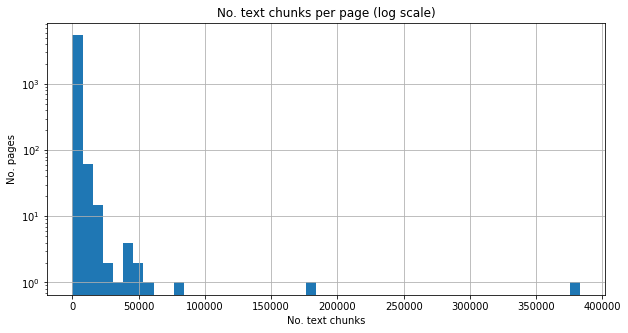

In [85]:
g.hist(bins=50, figsize=(10,5), log=True)
plt.title('No. text chunks per page (log scale)')
plt.xlabel('No. text chunks')
plt.ylabel('No. pages')

In [90]:
g.describe()

count      5535.000000
mean        670.487805
std        6290.995000
min           1.000000
25%          11.000000
50%          22.000000
75%          53.000000
max      382788.000000
dtype: float64

**Analysis**:
* A number of documents have pages with an absurd number of "text chunks"
* With this long tail, the average is pulled up to ~600
* Half of the pages have <22 text boxes

**Conclusions**:
* We must further investigate those with 1 text box
* We must also investigate those with a large number of textboxes

In [86]:
display(g[g > 35000].to_frame())


0
file                                               pg         
/home/stefania/Downloads/NRCAN zips/bu_588__PDF... 3     51635
/home/stefania/Downloads/NRCAN zips/bu_588__PDF... 2     55349
/home/stefania/Downloads/NRCAN zips/bu_588__PDF... 2     42029
/home/stefania/Downloads/NRCAN zips/bu_588__PDF... 2     44203
/home/stefania/Downloads/NRCAN zips/bu_588__PDF... 2     46948
/home/stefania/Downloads/NRCAN zips/of_7196__Di... 0    382788
/home/stefania/Downloads/NRCAN zips/of_7196__Di... 0    179135
/home/stefania/Downloads/NRCAN zips/of_7196__of... 418   41727
                                                   527   41756
/home/stefania/Downloads/NRCAN zips/sp_0097_gsc... 0     78699

In [88]:
display(df[(df.file == "/home/stefania/Downloads/NRCAN zips/bu_588__PDF__588_05.pdfminer_split.txt") & (df.pg == 3)].head())
df[(df.file == "/home/stefania/Downloads/NRCAN zips/bu_588__PDF__588_05.pdfminer_split.txt") & (df.pg == 3)].tail()

,obj_type,pg,pos_x0,pos_y0,pos_x1,pos_y1,text,file,width,height,nwords,id,nwords_stripped
Unnamed: 0,,,,,,,,,,,,,
42,<class 'pdfminer.layout.LTTextBoxVertical'>,3,743.270741,496.641534,751.270541,558.000000,GSC Bulletin 588\n,/home/stefania/Downloads/NRCAN zips/bu_588__PD...,7.999800,61.358466,3.0,bu_588,3.0
43,<class 'pdfminer.layout.LTTextBoxHorizontal'>,3,637.229806,385.876835,655.081520,411.886121,D o m ain\nD o m ain\n,/home/stefania/Downloads/NRCAN zips/bu_588__PD...,17.851714,26.009286,8.0,bu_588,8.0
44,<class 'pdfminer.layout.LTTextBoxHorizontal'>,3,576.999860,312.285585,638.338850,393.709884,Sue pit:\nRAT-01-MF1\n(Z7465)\nMcClean Lake\nM...,/home/stefania/Downloads/NRCAN zips/bu_588__PD...,61.338990,81.424298,29.0,bu_588,29.0
45,<class 'pdfminer.layout.LTTextBoxHorizontal'>,3,598.037795,316.204438,611.978536,324.393139,TT\n,/home/stefania/Downloads/NRCAN zips/bu_588__PD...,13.940741,8.188701,1.0,bu_588,1.0
46,<class 'pdfminer.layout.LTTextBoxHorizontal'>,3,564.285605,318.423462,573.806071,325.046434,RD\n,/home/stefania/Downloads/NRCAN zips/bu_588__PD...,9.520466,6.622972,1.0,bu_588,1.0


,obj_type,pg,pos_x0,pos_y0,pos_x1,pos_y1,text,file,width,height,nwords,id,nwords_stripped
Unnamed: 0,,,,,,,,,,,,,
51672,<class 'pdfminer.layout.LTCurve'>,3,230.567,340.461,238.983,348.944,NaN,/home/stefania/Downloads/NRCAN zips/bu_588__PD...,8.416,8.483,NaN,bu_588,NaN
51673,<class 'pdfminer.layout.LTCurve'>,3,230.567,340.461,238.983,348.944,NaN,/home/stefania/Downloads/NRCAN zips/bu_588__PD...,8.416,8.483,NaN,bu_588,NaN
51674,<class 'pdfminer.layout.LTCurve'>,3,170.859,342.270,179.274,350.754,NaN,/home/stefania/Downloads/NRCAN zips/bu_588__PD...,8.415,8.484,NaN,bu_588,NaN
51675,<class 'pdfminer.layout.LTCurve'>,3,170.859,342.270,179.274,350.754,NaN,/home/stefania/Downloads/NRCAN zips/bu_588__PD...,8.415,8.484,NaN,bu_588,NaN
51676,<class 'pdfminer.layout.LTCurve'>,3,323.912,454.738,326.382,457.167,NaN,/home/stefania/Downloads/NRCAN zips/bu_588__PD...,2.470,2.429,NaN,bu_588,NaN


In [91]:
g = df[~df.text.isnull()][['file', 'pg']].groupby(['file', 'pg'])
g.ngroups

5353

Text(0, 0.5, 'No. pages')

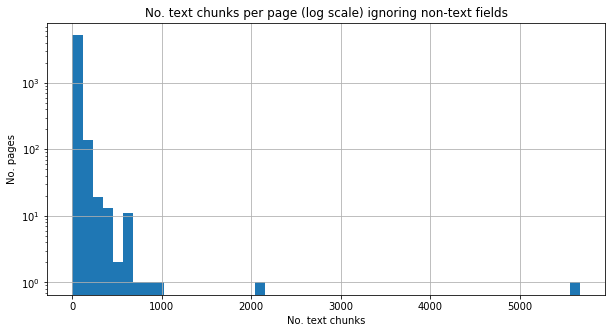

In [94]:
g.size().hist(bins=50, figsize=(10,5), log=True)
plt.title('No. text chunks per page (log scale) ignoring non-text fields')
plt.xlabel('No. text chunks')
plt.ylabel('No. pages')

In [98]:
g.size().describe()

count    5353.000000
mean       35.110592
std        96.844916
min         1.000000
25%        10.000000
50%        19.000000
75%        42.000000
max      5672.000000
dtype: float64

In [108]:
g = df[~df.text.isnull() & (df.text.str.strip() != "")][['file', 'pg']].groupby(['file', 'pg'])
g.ngroups

5353

Text(0, 0.5, 'No. pages')

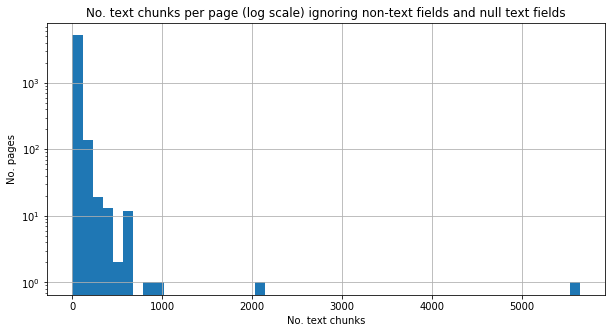

In [101]:
g.size().hist(bins=50, figsize=(10,5), log=True)
plt.title('No. text chunks per page (log scale) ignoring non-text fields and null text fields')
plt.xlabel('No. text chunks')
plt.ylabel('No. pages')

In [102]:
g.size().describe()

count    5353.000000
mean       34.870540
std        96.347317
min         1.000000
25%        10.000000
50%        19.000000
75%        42.000000
max      5639.000000
dtype: float64

In [124]:
#display(g.size()[(g.size() == 1)].to_frame())
# an example with only 1 word on a page
df[(df.file == "/home/stefania/Downloads/NRCAN zips/bu_506.pdfminer_split.txt") & (df.pg.isin([149,150,152,157]))]
df[(df.file == "/home/stefania/Downloads/NRCAN zips/rp_1846_47.pdfminer_split.txt") & (df.pg == 12)].text
# the above example is really butchered text-wise

Unnamed: 0
123    inter-· \nlayers,  t> mall  Ll oocl-rccl  jasp...
124                                                  NaN
125                                                  NaN
Name: text, dtype: object

**Analysis**:
* Simply excluding boxes with no text greatly reduces the number of boxes per page
* The average has dropped to 35, and half the docs have < 19 boxes/page
* There is no need to exclude empty string as well as null text boxes

In [99]:
gg = g.size().to_frame()
gg[gg[0] > 5000]

,,0
file,pg,
/home/stefania/Downloads/NRCAN zips/of_7196__Digital Supplement 2 - Surficial Geology_Surficial Map MERA compilation.pdfminer_split.txt,0,5672


In [106]:
gg = df[(df.file.str.contains("of_7196") & df.file.str.contains("MERA") & df.file.str.contains("compilation") & df.file.str.contains("Surficial")) & (df.pg == 0) & (~df.text.isnull())]
display(gg.text.unique()[0:20])
print(gg.shape)
print(gg[gg.text.str.strip() != ""].head())
print(gg[gg.text.str.strip() != ""].shape)

array(["45'\n", "30'\n", "15'\n", "110°00'\n", "109°00'\n", "108°00'\n",
       "107°00'\n", "106°00'\n", "105°50'\n", "64°00'\n", "111°45'\n",
       "111°00'\n", 'M A C K A Y\n', 'L A K E\n',
       'SUPPLEMENT 2: Surficial Geology of the proposed Thaidene Nene National Park\n',
       'Reserve in the area of the East Arm of Great Slave Lake,\nNorthwest Territories\n',
       'Y\n', ' \n', 'A\nB\n', ' \n \n \n \n \n \n \n \n \n'],
      dtype=object)

(5672, 13)
                                                 obj_type  pg       pos_x0  \
Unnamed: 0                                                                   
0           <class 'pdfminer.layout.LTTextBoxHorizontal'>   0   911.904241   
1           <class 'pdfminer.layout.LTTextBoxHorizontal'>   0  1050.417235   
2           <class 'pdfminer.layout.LTTextBoxHorizontal'>   0  1189.140526   
3           <class 'pdfminer.layout.LTTextBoxHorizontal'>   0  1318.618425   
4           <class 'pdfminer.layout.LTTextBoxHorizontal'>   0  1466.120104   

                 pos_y0       pos_x1       pos_y1       text  \
Unnamed: 0                                                     
0           3002.281469   923.706441  3011.303429      45'\n   
1           2998.194695  1062.189705  3007.200368      30'\n   
2           2994.862624  1200.882906  3003.851953      15'\n   
3           2991.842555  1348.321406  3001.121410  110°00'\n   
4           2989.611753  1477.786804  2998.559625      45'

##  Number of words per page

In [125]:
g = df.loc[~df.text.isnull(), ['file', 'pg', 'nwords']].groupby(['file', 'pg'])
g.sum().describe()

,nwords
count,5353.000000
mean,476.419391
std,335.886983
min,1.000000
25%,239.000000
50%,444.000000
75%,638.000000
max,6891.000000


Text(0, 0.5, 'No. pages')

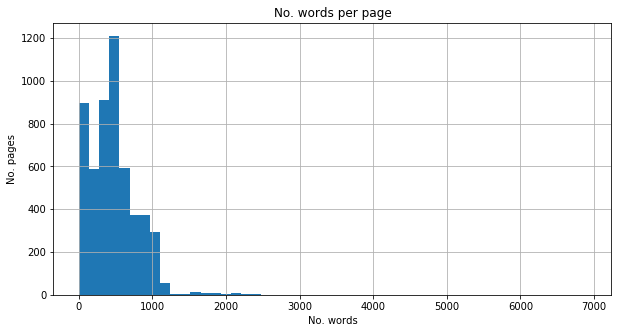

In [128]:
g.sum().hist(bins=50, figsize=(10,5))
plt.title('No. words per page')
plt.xlabel('No. words')
plt.ylabel('No. pages')

In [138]:
gg = g.sum()
display(gg[gg.nwords > 6000])
df[(df.file.str.contains("/home/stefania/Downloads/NRCAN zips/of_7196__.*Map MERA compilation.pdfminer_split.txt")) & (df.pg == 0)].head()


,,nwords
file,pg,
/home/stefania/Downloads/NRCAN zips/of_7196__Digital Supplement 2 - Surficial Geology_Surficial Map MERA compilation.pdfminer_split.txt,0,6891.0


,obj_type,pg,pos_x0,pos_y0,pos_x1,pos_y1,text,file,width,height,nwords,id,nwords_stripped
Unnamed: 0,,,,,,,,,,,,,
0,<class 'pdfminer.layout.LTTextBoxHorizontal'>,0,911.904241,3002.281469,923.706441,3011.303429,45'\n,/home/stefania/Downloads/NRCAN zips/of_7196__D...,11.802200,9.021960,1.0,of_7196,1.0
1,<class 'pdfminer.layout.LTTextBoxHorizontal'>,0,1050.417235,2998.194695,1062.189705,3007.200368,30'\n,/home/stefania/Downloads/NRCAN zips/of_7196__D...,11.772470,9.005672,1.0,of_7196,1.0
2,<class 'pdfminer.layout.LTTextBoxHorizontal'>,0,1189.140526,2994.862624,1200.882906,3003.851953,15'\n,/home/stefania/Downloads/NRCAN zips/of_7196__D...,11.742380,8.989330,1.0,of_7196,1.0
3,<class 'pdfminer.layout.LTTextBoxHorizontal'>,0,1318.618425,2991.842555,1348.321406,3001.121410,110°00'\n,/home/stefania/Downloads/NRCAN zips/of_7196__D...,29.702981,9.278855,1.0,of_7196,1.0
4,<class 'pdfminer.layout.LTTextBoxHorizontal'>,0,1466.120104,2989.611753,1477.786804,2998.559625,45'\n,/home/stefania/Downloads/NRCAN zips/of_7196__D...,11.666700,8.947872,1.0,of_7196,1.0


In [ ]:
## Number of "real words"

"Real word" = no numbers, no symbols

In [230]:
g = df.loc[~df.text.isnull(), ['file', 'pg', 'nwords', 'text']].groupby(['file', 'pg'])

In [231]:
h = g.agg({'nwords': sum, 'text': lambda x: ' '.join(x)})
#g.text.str.replace('[^a-zA-Z]', ' ')

In [232]:
h['text_stripped'] = h.text.str.strip().str.replace('\s+', ' ')

In [233]:
h['nwords_stripped']= h.text_stripped.str.split().str.len()
h.head()

nwords  \
file                                               pg           
/home/stefania/Downloads/NRCAN zips/bu_003.pdfm... 0     38.0   
                                                   1     38.0   
                                                   3   2719.0   
                                                   4    869.0   
                                                   5    293.0   

                                                                                                    text  \
file                                               pg                                                      
/home/stefania/Downloads/NRCAN zips/bu_003.pdfm... 0   CANADA \n DEPARTMENT  OF  MINES  AND  RESOURCE...   
                                                   1   CANADA \n · DEPARTMENT  OF  MINES  AND  RESOUR...   
                                                   3   CONTENTS \n CHAPTER  I \n CHAPTER  TI \n Pre'f...   
                                                   4   Basic intrusive rocks  ........ . .. .. .........   
                                                   5   V \n PREFACE \n Few mining districts in the wo...   

                                                                                           text_stripped  \
file                                               pg                                                      
/home/stefania/Downloads/NRCAN zips/bu_003.pdfm... 0   CANADA DEPARTMENT OF MINES AND RESOURCES MINES...   
                                                   1   CANADA · DEPARTMENT OF MINES AND RESOURCES MIN...   
                                                   3   CONTENTS CHAPTER I CHAPTER TI Pre'face Introdu...   
                                                   4   Basic intrusive rocks ........ . .. .. ...... ...   
                                                   5   V PREFACE Few mining districts in the world ha...   

                                                       nwords_stripped  
file                                               pg                   
/home/stefania/Downloads/NRCAN zips/bu_003.pdfm... 0                38  
                                                   1                38  
                                                   3              2719  
                                                   4               869  
                                                   5               293

In [234]:
h['text_nopunct'] = h.text_stripped.str.replace('[^a-zA-Z\s]', ' ').str.replace("\s+", " ")
h['nwords_nopunct'] = h.text_nopunct.str.split().str.len()
h.head()

nwords  \
file                                               pg           
/home/stefania/Downloads/NRCAN zips/bu_003.pdfm... 0     38.0   
                                                   1     38.0   
                                                   3   2719.0   
                                                   4    869.0   
                                                   5    293.0   

                                                                                                    text  \
file                                               pg                                                      
/home/stefania/Downloads/NRCAN zips/bu_003.pdfm... 0   CANADA \n DEPARTMENT  OF  MINES  AND  RESOURCE...   
                                                   1   CANADA \n · DEPARTMENT  OF  MINES  AND  RESOUR...   
                                                   3   CONTENTS \n CHAPTER  I \n CHAPTER  TI \n Pre'f...   
                                                   4   Basic intrusive rocks  ........ . .. .. .........   
                                                   5   V \n PREFACE \n Few mining districts in the wo...   

                                                                                           text_stripped  \
file                                               pg                                                      
/home/stefania/Downloads/NRCAN zips/bu_003.pdfm... 0   CANADA DEPARTMENT OF MINES AND RESOURCES MINES...   
                                                   1   CANADA · DEPARTMENT OF MINES AND RESOURCES MIN...   
                                                   3   CONTENTS CHAPTER I CHAPTER TI Pre'face Introdu...   
                                                   4   Basic intrusive rocks ........ . .. .. ...... ...   
                                                   5   V PREFACE Few mining districts in the world ha...   

                                                       nwords_stripped  \
file                                               pg                    
/home/stefania/Downloads/NRCAN zips/bu_003.pdfm... 0                38   
                                                   1                38   
                                                   3              2719   
                                                   4               869   
                                                   5               293   

                                                                                            text_nopunct  \
file                                               pg                                                      
/home/stefania/Downloads/NRCAN zips/bu_003.pdfm... 0   CANADA DEPARTMENT OF MINES AND RESOURCES MINES...   
                                                   1   CANADA DEPARTMENT OF MINES AND RESOURCES MINES...   
                                                   3   CONTENTS CHAPTER I CHAPTER TI Pre face Introdu...   
                                                   4   Basic intrusive rocks Pre Huronian gabbro ii i...   
                                                   5   V PREFACE Few mining districts in the world ha...   

                                                       nwords_nopunct  
file                                               pg                  
/home/stefania/Downloads/NRCAN zips/bu_003.pdfm... 0               36  
                                                   1               36  
                                                   3              228  
                                                   4              221  
                                                   5              289

Text(0, 0.5, 'No. pages')

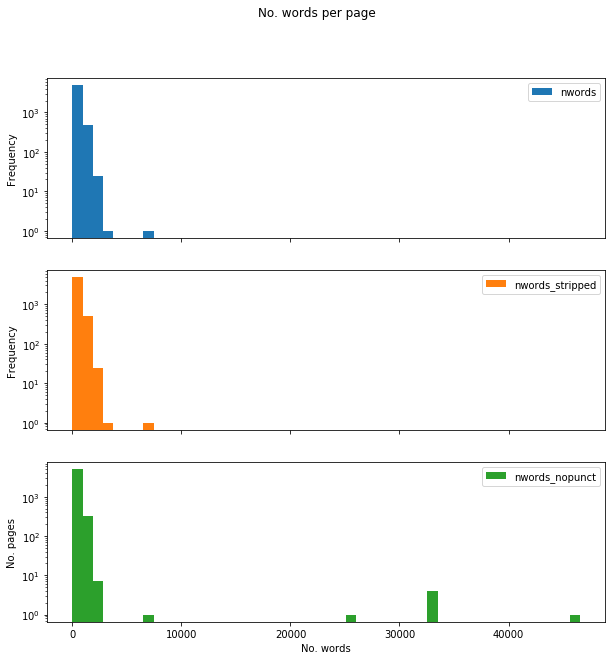

In [235]:
h.groupby(['file', 'pg']).sum().plot(kind='hist', bins=50, subplots=True, figsize=(10,10), logy=True)
# for hname, hhgroup in hh:
#     hhgroup.sum().hist(bins=50, figsize=(10,5))
plt.suptitle('No. words per page')
plt.xlabel('No. words')
plt.ylabel('No. pages')

In [ ]:
# Vocabulary

In [236]:
import numpy as np
def text_concat(x):
    return ' '.join(x)

display(h.head())
hh = h.groupby(lambda _ : True).agg({'nwords': np.sum, 'nwords_stripped': np.sum, 'nwords_nopunct': np.sum, 'text': text_concat, 'text_stripped': text_concat, 'text_nopunct': text_concat})
hh.head()

nwords  \
file                                               pg           
/home/stefania/Downloads/NRCAN zips/bu_003.pdfm... 0     38.0   
                                                   1     38.0   
                                                   3   2719.0   
                                                   4    869.0   
                                                   5    293.0   

                                                                                                    text  \
file                                               pg                                                      
/home/stefania/Downloads/NRCAN zips/bu_003.pdfm... 0   CANADA \n DEPARTMENT  OF  MINES  AND  RESOURCE...   
                                                   1   CANADA \n · DEPARTMENT  OF  MINES  AND  RESOUR...   
                                                   3   CONTENTS \n CHAPTER  I \n CHAPTER  TI \n Pre'f...   
                                                   4   Basic intrusive rocks  ........ . .. .. .........   
                                                   5   V \n PREFACE \n Few mining districts in the wo...   

                                                                                           text_stripped  \
file                                               pg                                                      
/home/stefania/Downloads/NRCAN zips/bu_003.pdfm... 0   CANADA DEPARTMENT OF MINES AND RESOURCES MINES...   
                                                   1   CANADA · DEPARTMENT OF MINES AND RESOURCES MIN...   
                                                   3   CONTENTS CHAPTER I CHAPTER TI Pre'face Introdu...   
                                                   4   Basic intrusive rocks ........ . .. .. ...... ...   
                                                   5   V PREFACE Few mining districts in the world ha...   

                                                       nwords_stripped  \
file                                               pg                    
/home/stefania/Downloads/NRCAN zips/bu_003.pdfm... 0                38   
                                                   1                38   
                                                   3              2719   
                                                   4               869   
                                                   5               293   

                                                                                            text_nopunct  \
file                                               pg                                                      
/home/stefania/Downloads/NRCAN zips/bu_003.pdfm... 0   CANADA DEPARTMENT OF MINES AND RESOURCES MINES...   
                                                   1   CANADA DEPARTMENT OF MINES AND RESOURCES MINES...   
                                                   3   CONTENTS CHAPTER I CHAPTER TI Pre face Introdu...   
                                                   4   Basic intrusive rocks Pre Huronian gabbro ii i...   
                                                   5   V PREFACE Few mining districts in the world ha...   

                                                       nwords_nopunct  
file                                               pg                  
/home/stefania/Downloads/NRCAN zips/bu_003.pdfm... 0               36  
                                                   1               36  
                                                   3              228  
                                                   4              221  
                                                   5              289

,nwords,nwords_stripped,nwords_nopunct,text,text_stripped,text_nopunct
True,2550273.0,2550273,2310136,CANADA \n DEPARTMENT OF MINES AND RESOURCE...,CANADA DEPARTMENT OF MINES AND RESOURCES MINES...,CANADA DEPARTMENT OF MINES AND RESOURCES MINES...


In [237]:
from collections import Counter

vocab_raw = Counter(hh.text.str.lower().str.split().values[0])
vocab_stripped = Counter(hh.text_stripped.str.lower().str.split().values[0])
vocab_nopunct = Counter(hh.text_nopunct.str.lower().str.split().values[0])

In [238]:
vocab_raw_df = pd.DataFrame.from_dict(vocab_raw, orient='index').reset_index()
vocab_raw_df.describe(percentiles=[x/10.0 for x in range(0, 10, 1)])

,0
count,229683.000000
mean,11.103447
std,431.312959
min,1.000000
0%,1.000000
10%,1.000000
20%,1.000000
30%,1.000000
40%,1.000000
50%,1.000000


In [239]:
vocab_stripped_df = pd.DataFrame.from_dict(vocab_stripped, orient='index').reset_index()
vocab_stripped_df.describe(percentiles=[x/10.0 for x in range(0, 10, 1)])

,0
count,229683.000000
mean,11.103447
std,431.312959
min,1.000000
0%,1.000000
10%,1.000000
20%,1.000000
30%,1.000000
40%,1.000000
50%,1.000000


In [240]:
vocab_nopunct_df = pd.DataFrame.from_dict(vocab_nopunct, orient='index').reset_index()
vocab_nopunct_df.describe(percentiles=[x/10.0 for x in range(0, 10, 1)])

,0
count,80517.000000
mean,28.691283
std,928.844567
min,1.000000
0%,1.000000
10%,1.000000
20%,1.000000
30%,1.000000
40%,1.000000
50%,1.000000


**Analysis**:
* even with stripped punctuation, the number of vocab words is exceedingly high (>80k)
* even with stripped punctuation, 50% of the words appear only once 

In [241]:
vocab_raw_df['len'] = vocab_raw_df['index'].str.len()
vocab_stripped_df['len'] = vocab_stripped_df['index'].str.len()
vocab_nopunct_df['len'] = vocab_nopunct_df['index'].str.len()

In [242]:
display(vocab_raw_df.len.describe().to_frame())
display(vocab_stripped_df.len.describe().to_frame())
display(vocab_nopunct_df.len.describe().to_frame())

,len
count,229683.000000
mean,9.668295
std,37.402978
min,1.000000
25%,5.000000
50%,7.000000
75%,9.000000
max,1207.000000


,len
count,229683.000000
mean,9.668295
std,37.402978
min,1.000000
25%,5.000000
50%,7.000000
75%,9.000000
max,1207.000000


,len
count,80517.000000
mean,7.312096
std,3.167396
min,1.000000
25%,5.000000
50%,7.000000
75%,9.000000
max,96.000000


In [243]:
vocab_nopunct_df[vocab_nopunct_df['len'] > 30]

,index,0,len
9011,thepresenceofstratiformsulphides,1,32
11880,lazenbylakeandwolverinepointformations,2,38
11908,theseincludemultipleductilemovementsbeforedepo...,1,96
11910,locationmapoftheathabascabasinincludingtheatha...,1,92
12802,slipmovementsduringandafterdeposition,3,37
12805,theseincludemultipleductilemovementsbeforedepo...,2,93
12812,withrespecttomajorbasementdomains,1,33
13298,athabascabasingeologywithsuperimposedpaleocurr...,1,86
17781,theoverlyingmanitoufallsformationinthemcarthur...,1,55
17782,stratainthemcarthurriverareacomprisetwoformati...,1,59


In [248]:
#!pip install english-words # garbage. 
!pip install pyenchant

You should consider upgrading via the 'pip install --upgrade pip' command.


In [254]:
#from english_words import english_words_lower_set
import enchant
en_dict = enchant.Dict("en_CA")
display(en_dict)
vocab_nopunct_df['valid_en_word'] = vocab_nopunct_df['index'].apply(lambda x: en_dict.check(x) if en_dict.check(x) else en_dict.check(x[0].upper() + x[1:]))#vocab_nopunct_df['index'].isin(english_words_lower_set)
vocab_nopunct_df

,index,0,len,valid_en_word
0,canada,5462,6,True
1,department,225,10,True
2,of,80146,2,True
3,mines,1015,5,True
4,and,59359,3,True
5,resources,660,9,True
6,geology,2223,7,True
7,branch,282,6,True
8,geological,4442,10,True
9,survey,2999,6,True


In [257]:
vocab_nopunct_df.valid_en_word.value_counts()

False    61921
True     18596
Name: valid_en_word, dtype: int64

In [258]:
vocab_nopunct_df[~vocab_nopunct_df.valid_en_word].sort_values('len')

,index,0,len,valid_en_word
4337,ds,25,2,False
9453,gb,38,2,False
35223,kh,66,2,False
2441,ys,20,2,False
2440,wa,110,2,False
29875,yl,9,2,False
12369,hc,60,2,False
12372,gc,68,2,False
75348,yy,1,2,False
16466,sz,3,2,False


In [262]:
vocab_nopunct_df[~vocab_nopunct_df.valid_en_word].len.value_counts().sort_index()

2      386
3     3552
4     6639
5     8273
6     8644
7     8119
8     7101
9     6129
10    4683
11    3129
12    2081
13    1394
14     735
15     468
16     219
17     122
18      69
19      35
20      25
21      13
22      17
23       4
24      10
25       5
26       4
27       3
28       3
29       5
30       4
32       3
      ... 
34       1
36       2
37       3
38       3
40       1
42       1
44       2
50       1
51       1
52       1
55       2
57       1
58       3
59       1
61       1
66       2
69       2
70       1
72       2
75       1
77       1
84       2
85       1
86       2
88       1
89       1
90       1
92       2
93       1
96       1
Name: len, Length: 61, dtype: int64

In [265]:
vocab_nopunct_df[~vocab_nopunct_df.valid_en_word & (vocab_nopunct_df.len > 20)].sort_values('len')

,index,0,len,valid_en_word
26837,phasengeschwindigkeit,1,21,False
70499,specimensillustrating,1,21,False
8315,pentlanditelviolarite,3,21,False
17778,generalizedfaultzones,2,21,False
11877,andcarswellformations,2,21,False
36724,intergouvernementales,1,21,False
8790,generalizedgeological,1,21,False
36363,copyrightdroitdauteur,8,21,False
28427,wirtschaftsgeologisch,1,21,False
19323,cordieritesillimanite,1,21,False


In [267]:
vocab_nopunct_df[~vocab_nopunct_df.valid_en_word & (vocab_nopunct_df.len <=4)].sort_values('len')

,index,0,len,valid_en_word
22148,jd,10,2,False
70394,nx,3,2,False
10362,ug,17,2,False
16325,ib,12,2,False
10395,lf,28,2,False
16222,ku,30,2,False
3716,gu,23,2,False
30540,og,78,2,False
30537,yt,3,2,False
22020,ju,21,2,False


**Analysis**:
* 60k out of 80k (3/4) of the words int he dataset are not real english words
* it's a pretty good bet than any words with > 20 char are concatenations of existing words (about 600 of them)
* it also might be reasonable to think that words with 2,3,4... chars are segments of words that have been broken apart (about 10k of them)

# Try the same thing, now per document


In [275]:
import numpy as np
def text_concat(x):
    return ' '.join(x)

hh = h.groupby('file').agg({'nwords': np.sum, 'nwords_stripped': np.sum, 'nwords_nopunct': np.sum, 'text': text_concat, 'text_stripped': text_concat, 'text_nopunct': text_concat})
hh.head()

,nwords,nwords_stripped,nwords_nopunct,text,text_stripped,text_nopunct
file,,,,,,
/home/stefania/Downloads/NRCAN zips/bu_003.pdfminer_split.txt,45216.0,45216,41470,CANADA \n DEPARTMENT OF MINES AND RESOURCE...,CANADA DEPARTMENT OF MINES AND RESOURCES MINES...,CANADA DEPARTMENT OF MINES AND RESOURCES MINES...
/home/stefania/Downloads/NRCAN zips/bu_506.pdfminer_split.txt,126533.0,126533,121188,GEOLOGICAL SURVEY OF CANADA \nBULLETIN 506...,GEOLOGICAL SURVEY OF CANADA BULLETIN 506 GEOLO...,GEOLOGICAL SURVEY OF CANADA BULLETIN GEOLOGY A...
/home/stefania/Downloads/NRCAN zips/bu_588__PDF__588_01.pdfminer_split.txt,10746.0,10746,10168,Sequence stratigraphy in the western Athabasca...,Sequence stratigraphy in the western Athabasca...,Sequence stratigraphy in the western Athabasca...
/home/stefania/Downloads/NRCAN zips/bu_588__PDF__588_02.pdfminer_split.txt,11053.0,11053,10666,Alteration features and geochemical signatures...,Alteration features and geochemical signatures...,Alteration features and geochemical signatures...
/home/stefania/Downloads/NRCAN zips/bu_588__PDF__588_03.pdfminer_split.txt,11712.0,11712,11150,Origin of organic matter in the Proterozoic\nA...,Origin of organic matter in the Proterozoic At...,Origin of organic matter in the Proterozoic At...


In [279]:
safe_check = lambda x: en_dict.check(x) if en_dict.check(x) else en_dict.check(x[0].upper() + x[1:])
hh['text_nopunct_legal_words'] = hh.text_nopunct.apply(lambda x: Counter([safe_check(xx.lower()) for xx in x.split()]))
hh['text_nopunct_legal_words_perc'] = hh.text_nopunct_legal_words.apply(lambda x: x[True]/(x[True] + x[False]))
hh

,nwords,nwords_stripped,nwords_nopunct,text,text_stripped,text_nopunct,text_nopunct_legal_words,text_nopunct_legal_words_perc
file,,,,,,,,
/home/stefania/Downloads/NRCAN zips/bu_003.pdfminer_split.txt,45216.0,45216,41470,CANADA \n DEPARTMENT OF MINES AND RESOURCE...,CANADA DEPARTMENT OF MINES AND RESOURCES MINES...,CANADA DEPARTMENT OF MINES AND RESOURCES MINES...,"{True: 36609, False: 4861}",0.882783
/home/stefania/Downloads/NRCAN zips/bu_506.pdfminer_split.txt,126533.0,126533,121188,GEOLOGICAL SURVEY OF CANADA \nBULLETIN 506...,GEOLOGICAL SURVEY OF CANADA BULLETIN 506 GEOLO...,GEOLOGICAL SURVEY OF CANADA BULLETIN GEOLOGY A...,"{True: 102926, False: 18262}",0.849309
/home/stefania/Downloads/NRCAN zips/bu_588__PDF__588_01.pdfminer_split.txt,10746.0,10746,10168,Sequence stratigraphy in the western Athabasca...,Sequence stratigraphy in the western Athabasca...,Sequence stratigraphy in the western Athabasca...,"{True: 8849, False: 1319}",0.870279
/home/stefania/Downloads/NRCAN zips/bu_588__PDF__588_02.pdfminer_split.txt,11053.0,11053,10666,Alteration features and geochemical signatures...,Alteration features and geochemical signatures...,Alteration features and geochemical signatures...,"{True: 9315, False: 1351}",0.873336
/home/stefania/Downloads/NRCAN zips/bu_588__PDF__588_03.pdfminer_split.txt,11712.0,11712,11150,Origin of organic matter in the Proterozoic\nA...,Origin of organic matter in the Proterozoic At...,Origin of organic matter in the Proterozoic At...,"{True: 9572, False: 1578}",0.858475
/home/stefania/Downloads/NRCAN zips/bu_588__PDF__588_04.pdfminer_split.txt,11559.0,11559,11152,Topographic influences on the sedimentology of...,Topographic influences on the sedimentology of...,Topographic influences on the sedimentology of...,"{True: 9787, False: 1365}",0.877600
/home/stefania/Downloads/NRCAN zips/bu_588__PDF__588_05.pdfminer_split.txt,12086.0,12086,10992,"Age, provenance, and regional correlation of t...","Age, provenance, and regional correlation of t...",Age provenance and regional correlation of the...,"{True: 9336, False: 1656}",0.849345
/home/stefania/Downloads/NRCAN zips/bu_588__PDF__588_06.pdfminer_split.txt,8648.0,8648,8473,Stratigraphy and sedimentology of the Maybelle...,Stratigraphy and sedimentology of the Maybelle...,Stratigraphy and sedimentology of the Maybelle...,"{False: 1267, True: 7206}",0.850466
/home/stefania/Downloads/NRCAN zips/bu_588__PDF__588_07.pdfminer_split.txt,12015.0,12015,11523,High-resolution seismic survey from the McArth...,High-resolution seismic survey from the McArth...,High resolution seismic survey from the McArth...,"{True: 10206, False: 1317}",0.885707


In [282]:
hh.text_nopunct_legal_words_perc.describe()

count    172.000000
mean       0.816110
std        0.108772
min        0.471088
25%        0.749152
50%        0.848524
75%        0.896057
max        1.000000
Name: text_nopunct_legal_words_perc, dtype: float64

In [285]:
hh[hh.text_nopunct_legal_words_perc < 0.8]

,nwords,nwords_stripped,nwords_nopunct,text,text_stripped,text_nopunct,text_nopunct_legal_words,text_nopunct_legal_words_perc
file,,,,,,,,
/home/stefania/Downloads/NRCAN zips/bu_588__PDF__588_Author_index.pdfminer_split.txt,488.0,488,384,"644\n Muehlenbachs, K. ..........................","644 Muehlenbachs, K. ............................",Muehlenbachs K Mueller C Mwenifumbo C J Olson...,"{False: 102, True: 282}",0.734375
/home/stefania/Downloads/NRCAN zips/bu_588__PDF__588_Preface.pdfminer_split.txt,1452.0,1452,1593,PREFACE\n PRÉFACE\n EXTECH (EXploration scienc...,PREFACE PRÉFACE EXTECH (EXploration science an...,PREFACE PR FACE EXTECH EXploration science and...,"{True: 1096, False: 497}",0.688010
/home/stefania/Downloads/NRCAN zips/bu_588__PDF__588_Summary.pdfminer_split.txt,21484.0,21484,23655,"1\n Dans la première section de cet ouvrage, o...","1 Dans la première section de cet ouvrage, on ...",Dans la premi re section de cet ouvrage on pr...,"{False: 8657, True: 14998}",0.634031
/home/stefania/Downloads/NRCAN zips/cr_2000_c20.pdfminer_split.txt,4146.0,4146,4154,Geological Survey\nof Canada\n Current Researc...,Geological Survey of Canada Current Research 2...,Geological Survey of Canada Current Research C...,"{True: 3310, False: 844}",0.796822
/home/stefania/Downloads/NRCAN zips/do_pub_14_11.pdfminer_split.txt,9079.0,9079,8185,CANADA \nDEPARTMENT OF MINES AND TECHNICAL...,CANADA DEPARTMENT OF MINES AND TECHNICAL SURVE...,CANADA DEPARTMENT OF MINES AND TECHNICAL SURVE...,"{True: 6426, False: 1759}",0.785095
/home/stefania/Downloads/NRCAN zips/ebp_2002_2005_f.pdfminer_split.txt,14463.0,14463,14685,T A B L E D E S M A T I È R E S \n Messag...,T A B L E D E S M A T I È R E S Message du sou...,T A B L E D E S M A T I R E S Message du sous ...,"{True: 7728, False: 6957}",0.526251
/home/stefania/Downloads/NRCAN zips/eg_23__eg_23_table1_supplement.pdfminer_split.txt,816.0,816,665,63L \n 53N \n 52K \n SZB \n 521 \n 50 zs \n 5...,63L 53N 52K SZB 521 50 zs 50 LS - 51 l5 50 44 ...,L N K SZB zs LS l TABLE BERYLLIUM OCCURRENCES...,"{True: 496, False: 169}",0.745865
/home/stefania/Downloads/NRCAN zips/epb_ss_92.pdfminer_split.txt,32102.0,32102,25417,Seismological Service \nof Canada \n Service s...,Seismological Service of Canada Service séismo...,Seismological Service of Canada Service s ismo...,"{True: 17973, False: 7444}",0.707125
/home/stefania/Downloads/NRCAN zips/gid_327202.pdfminer_split.txt,6718.0,6718,7419,1 \n Les terres du Canada \ndans Google Earth ...,1 Les terres du Canada dans Google Earth Janvi...,Les terres du Canada dans Google Earth Janvie...,"{True: 3495, False: 3924}",0.471088


In [287]:
hh[hh.text_nopunct_legal_words_perc > 0.9]

,nwords,nwords_stripped,nwords_nopunct,text,text_stripped,text_nopunct,text_nopunct_legal_words,text_nopunct_legal_words_perc
file,,,,,,,,
/home/stefania/Downloads/NRCAN zips/bu_588__PDF__588_12.pdfminer_split.txt,14648.0,14648,14347,Quaternary geology of the eastern\nAthabasca B...,Quaternary geology of the eastern Athabasca Ba...,Quaternary geology of the eastern Athabasca Ba...,"{True: 12919, False: 1428}",0.900467
/home/stefania/Downloads/NRCAN zips/bu_588__PDF__588_18.pdfminer_split.txt,7166.0,7166,6657,Audio-magnetotelluric studies at the McArthur\...,Audio-magnetotelluric studies at the McArthur ...,Audio magnetotelluric studies at the McArthur ...,"{True: 6031, False: 626}",0.905964
/home/stefania/Downloads/NRCAN zips/bu_588__PDF__588_24.pdfminer_split.txt,13801.0,13801,12843,Integrated field investigations of airborne\nr...,Integrated field investigations of airborne ra...,Integrated field investigations of airborne ra...,"{True: 11648, False: 1195}",0.906953
/home/stefania/Downloads/NRCAN zips/do_ss_1969_4.pdfminer_split.txt,3776.0,3776,2645,SEISMOLOGICAL SERIES \nof the \n 1969-4 \n C...,SEISMOLOGICAL SERIES of the 1969-4 Canadian Se...,SEISMOLOGICAL SERIES of the Canadian Seismic D...,"{True: 2384, False: 261}",0.901323
/home/stefania/Downloads/NRCAN zips/egs_19__esg_19.pdfminer_split.txt,54778.0,54778,46453,"MICA DEPOSITS OF CANADA \n No. 2554 \n 4,0...","MICA DEPOSITS OF CANADA No. 2554 4,000-1959-14...",MICA DEPOSITS OF CANADA No GEOLOGICAL SURVEY ...,"{True: 43203, False: 3250}",0.930037
/home/stefania/Downloads/NRCAN zips/emr_ic_258.pdfminer_split.txt,9852.0,9852,9359,FOREWORD \n Increasingly the resources of t...,FOREWORD Increasingly the resources of the Min...,FOREWORD Increasingly the resources of the Min...,"{True: 8702, False: 657}",0.929800
/home/stefania/Downloads/NRCAN zips/gip_029.pdfminer_split.txt,2049.0,2049,2051,\n EARTH SCIENCES SECTOR \nGENERAL INFORMAT...,EARTH SCIENCES SECTOR GENERAL INFORMATION PROD...,EARTH SCIENCES SECTOR GENERAL INFORMATION PROD...,"{True: 1900, False: 151}",0.926377
/home/stefania/Downloads/NRCAN zips/gip_095_e.pdfminer_split.txt,630.0,630,647,\n \n \n \n EARTH SCIENCE SECTOR \nGENERAL...,EARTH SCIENCE SECTOR GENERAL INFORMATION PRODU...,EARTH SCIENCE SECTOR GENERAL INFORMATION PRODU...,"{True: 623, False: 24}",0.962906
/home/stefania/Downloads/NRCAN zips/ir_epb_ggg_85_03.pdfminer_split.txt,4950.0,4950,4772,"?Af J ?,7 \n~ \n&k. \n/-2-1Jr \n SCIENTIFIC D...","?Af J ?,7 ~ &k. /-2-1Jr SCIENTIFIC DRILLING AT...",Af J k Jr SCIENTIFIC DRILLING AT THE EARTH PH...,"{False: 419, True: 4353}",0.912196


**Analysis**:
* on average documents are 81% "Real words" (and that's excluding any funny geological ones, so the real number is probably higher) (the median is about the same)
* there are however some documents that have <50% legal words. These are primarily supplement documents or french documents. But of those with < 80% there are real pdfs with poor ocr quality (see above).
* Some of the > 90% are fake (documents entirely of cid:X characters) or 


## Trying to fix the spacing issues...

In [352]:
display(en_dict.check("CANADA"))
display(en_dict.check("Canada"))
display(en_dict.check("canada"))

display(en_dict.check("Surface"))
display(en_dict.check("surface"))
en_dict.check("SURFACE")

display(en_dict.check("Surface."))
display(en_dict.check("surface."))
en_dict.check("SURFACE.")

True

True

False

True

True

True

True

True

In [12]:
bu_df = df[df.file.str.contains("wsp_325")]
bu_df

,obj_type,pg,pos_x0,pos_y0,pos_x1,pos_y1,text,file,width,height,nwords,id
Unnamed: 0,,,,,,,,,,,,
0,<class 'pdfminer.layout.LTFigure'>,0,0.000000,0.000000,1631.760010,1012.799988,NaN,/home/stefania/Downloads/NRCAN zips/wsp_325__w...,1631.760010,1012.799988,NaN,wsp_325
0,<class 'pdfminer.layout.LTTextBoxHorizontal'>,0,164.336400,779.635200,355.523708,794.040400,DEPARTMENT OF MINES \n,/home/stefania/Downloads/NRCAN zips/wsp_325__w...,191.187308,14.405200,3.0,wsp_325
1,<class 'pdfminer.layout.LTTextBoxHorizontal'>,0,227.610000,805.805200,291.286800,820.205200,CANADA \n,/home/stefania/Downloads/NRCAN zips/wsp_325__w...,63.676800,14.400000,1.0,wsp_325
2,<class 'pdfminer.layout.LTTextBoxHorizontal'>,0,242.130000,753.965200,278.138640,768.365200,AND \n,/home/stefania/Downloads/NRCAN zips/wsp_325__w...,36.008640,14.400000,1.0,wsp_325
3,<class 'pdfminer.layout.LTTextBoxHorizontal'>,0,178.424400,728.045200,341.976720,742.445200,TECHNICAL SURVEYS \n,/home/stefania/Downloads/NRCAN zips/wsp_325__w...,163.552320,14.400000,2.0,wsp_325
4,<class 'pdfminer.layout.LTTextBoxHorizontal'>,0,146.750000,696.755800,373.702520,709.355800,GEOLOGICAL SURVEY OF CANADA \n,/home/stefania/Downloads/NRCAN zips/wsp_325__w...,226.952520,12.600000,4.0,wsp_325
5,<class 'pdfminer.layout.LTTextBoxHorizontal'>,0,159.802400,666.755200,360.541311,679.355800,WATER SUPPLY PAPER No. 325 \n,/home/stefania/Downloads/NRCAN zips/wsp_325__w...,200.738911,12.600600,5.0,wsp_325
6,<class 'pdfminer.layout.LTTextBoxHorizontal'>,0,95.050000,588.830000,429.546001,608.830000,GROUND-WATER RESOURCES \n,/home/stefania/Downloads/NRCAN zips/wsp_325__w...,334.496001,20.000000,2.0,wsp_325
7,<class 'pdfminer.layout.LTTextBoxHorizontal'>,0,59.330000,469.790000,463.756000,578.830000,"OF \nTOWNSHIPS 1 to 6, RANGES 10 to ,13...",/home/stefania/Downloads/NRCAN zips/wsp_325__w...,404.426000,109.040000,14.0,wsp_325


In [13]:
display(bu_df.text.iloc[300])
display(bu_df.text.iloc[325])
display(bu_df.text.iloc[170])
display(bu_df.text.iloc[280])

"'blo.ck  o.lkali '  waters \n"

'Bicarbonates  (HC03) .  Carbon  dioxide  dissolved  in water \n'

'surface  geo logy .  The  wa.ter-bec.ring  pr operti es.  of  ~h e  bedrock  ch::i.nge \nfrom  formati on  to  formo.tion,  o.nd  ~ r e  r efe rred  to  iri  subs equent  pages . \nThe.type  of  gl a cio.l  deposi~ o.t  the  sur fo. ce  may  be  qetermi nod  f r om  the \nmo.p ,  o.nd  i ts  poss i bi li ties  o.s  o.n  o. quifer  c.r e  also  dis.cussed  iYl  this \nr eport. \n'

'commonl y  found  in  natural  waters  in  quo.nti ties  sufficient  to  have  any \npractical  effect  on  the  value  of  waters  for  ordinary  uses: \n'

In [17]:
import enchant
en_dict = enchant.Dict("en_CA")
import numpy as np


In [18]:
#def check_word_and_add_to_sets(word, new_sets, existing_sets)
def compute_best_joining(s_split):
    #print('---')
    #print(s_split)
    
    if len(s_split) == 0:
        return []
    if len(s_split) == 1:
        return [s_split]

    legal_sets = []
    
    # check if the first word is legal - if so, keep it
    
    if en_dict.check(s_split[0]):
        #print(f'{s_split[0]} is a real word')
        subsequent_sets = compute_best_joining(s_split[1:])
        #print('===')
        for subset in subsequent_sets:
            legal_sets.append([s_split[0]] + subset)
#     else: 
#         spellchecked = en_dict.suggest(s_split[0])
#         if len(spellchecked) > 0:
#             subsequent_sets = compute_best_joining(s_split[1:])
#             #print('===')
#             for subset in subsequent_sets:
#                 legal_sets.append([spellchecked[0]] + subset)        

    # check if [0+1, 2, ...] is legal
    #print([s_split[0] + s_split[1]])
    new_ssplit = [s_split[0] + s_split[1]] + s_split[2:] 
    #print(0, new_ssplit)

    if en_dict.check(new_ssplit[0]):
        #print(f'{new_ssplit[0]} is a real word')            
        subsequent_sets = compute_best_joining(new_ssplit[1:])
        #print('===')
        for subset in subsequent_sets:
            legal_sets.append([new_ssplit[0]] + subset)
#     else:
#         spellchecked = en_dict.suggest(new_ssplit[0])
#         if len(spellchecked) > 0:
#             subsequent_sets = compute_best_joining(new_ssplit[1:])
#             #print('===')
#             for subset in subsequent_sets:
#                 legal_sets.append([spellchecked[0]] + subset)                     

    # try all reasonable concatenations...
    curr_i = 1
    #print('...trying reasonable combos')
    while len(new_ssplit) > 2 and len(new_ssplit[0]) < 30:
        new_ssplit = [new_ssplit[0] + new_ssplit[1]] + new_ssplit[2:]
        #print(curr_i, new_ssplit)
        if en_dict.check(new_ssplit[0]):
            #print(f'{new_ssplit[0]} is a real word')   
            subsequent_sets = compute_best_joining(new_ssplit[1:])
            #print('===')
            for subset in subsequent_sets:
                legal_sets.append([new_ssplit[0]] + subset)
#         else:
#             spellchecked = en_dict.suggest(new_ssplit[0])
#             if len(spellchecked) > 0:
#                 subsequent_sets = compute_best_joining(new_ssplit[1:])
#                 #print('===')
#                 for subset in subsequent_sets:
#                     legal_sets.append([spellchecked[0]] + subset)              
        curr_i += 1

    # give up...
    if len(legal_sets) == 0:
        #print('...giving up')
        subsequent_sets = compute_best_joining(s_split[1:])
        #print('===')
        for subset in subsequent_sets:
            legal_sets.append([s_split[0]] +  subset)                                               
    
    #print('legal_sets:')
    #print(legal_sets)    
    return legal_sets
        
res = compute_best_joining(bu_df.text.iloc[170].split())            
res_new = []
for elem in res:
    res_new.append(' '.join(elem))
    
#for elem in res_new:
#    print(elem)
    
print('---')

legal_word_counts = []
for elem in res:
    n_legal_words = sum([1 if en_dict.check(word) and len(word) > 2 else 0 for word in elem])
    legal_word_counts.append(n_legal_words/len(elem))
#print(legal_word_counts)
    
idx = np.argmax(legal_word_counts)
print(idx)
print(res_new[idx])

---
1919
surface geology. The wa.ter-bec.ring properties. of ~h e bedrock ch::i.nge from formation to formo.tion, o.nd ~ re referred to iri subsequent pages. The.type of gl a cio.l deposi~ o.t the sur fo. ce maybe qetermi nod from the mo.p , o.nd its possibilities o.s o.n o. quifer c.r e also dis.cussed iYl this r eport.


In [49]:
print(res_new[idx])
import re

t = []

split_text = re.split(' ', res_new[idx])
for i, word in enumerate(split_text): #res_new[idx].split(' ')):
    newword = re.sub('[^a-zA-Z-]', '', word)
    if len(newword) == 0:
        t.append(word)
        continue
        
    if i < len(split_text) -1:
        next_word = split_text[i+1]
    if en_dict.check(word):
        t.append(word)
    else:
        if i < len(split_text) -1:
            sugg = en_dict.suggest(newword) + en_dict.suggest(newword + next_word)
        else:
            sugg = en_dict.suggest(newword)
        print(newword, sugg)
        if len(sugg) == 0:
            t.append(newword)
        elif len(sugg) > 0 and len(newword)>3:
            t.append(sugg[0])
        #elif len(word)<=3 and len(sugg[0])==len(word):
        #    t.append(sugg[0])
        else:
            t.append(newword)
        
print(' '.join(t))
        
print('...')
# for i in range(len(split_text) - 5):
#     text = ' '.join(split_text[i:i+5])
#     print(en_dict.suggest(text))

surface geology. The wa.ter-bec.ring properties. of ~h e bedrock ch::i.nge from formation to formo.tion, o.nd ~ re referred to iri subsequent pages. The.type of gl a cio.l deposi~ o.t the sur fo. ce maybe qetermi nod from the mo.p , o.nd its possibilities o.s o.n o. quifer c.r e also dis.cussed iYl this r eport.
water-becring ['water-bearing', 'water-Bering', 'water-Behring', 'water-cringing', 'water-cringe', 'waterboarding', 'water-properties']
h ['H', 'g', 'j', 'he', 'eh', 'sh', 'hi', 'ha', 'ah', 'hr', 'ht', 'ho', 'oh', 'ch', 'uh', 'eh', 'He', 'hr', 'h', 'e', 'hes', 'she', 'hie', 'hen', 'her', 'the', 'hoe', 'hue', 'hem', 'hep']
chinge ['singe', 'chine', 'hinge', 'change', 'cringe', 'whinge', 'c hinge', 'Schrodinger']
formotion ['formation', 'for motion', 'for-motion', 'formulation', 'formalization']
ond ['nod', 'ind', 'on', 'pond', 'bond', 'fond', 'Bond', 'don', 'one', 'end', 'and', 'old', 'odd', 'Ind', 'on d', 'fond']
iri ['ii', 'iris', 'ire', 'iii', 'irk', 'Fri', 'Ir', 'subsequent'

In [41]:
import nltk
# cleanup text
# rep = { '\n': ' ', '\\': ' ', '\"': '"', '-': ' ', '"': ' " ', 
#         '"': ' " ', '"': ' " ', ',':' , ', '.':' . ', '!':' ! ', 
#         '?':' ? ', "n't": " not" , "'ll": " will", '*':' * ', 
#         '(': ' ( ', ')': ' ) ', "s'": "s '"}
# rep = dict((re.escape(k), v) for k, v in rep.items()) 
# pattern = re.compile("|".join(rep.keys()))
# text = pattern.sub(lambda m: rep[re.escape(m.group(0))], text)
# def get_personslist(text):
#     personslist=[]
#     for sent in nltk.sent_tokenize(text):
#         for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
#             if isinstance(chunk, nltk.tree.Tree) and chunk.label() == 'PERSON':
#                 personslist.insert(0, (chunk.leaves()[0][0]))
#     return list(set(personslist))
# personslist = get_personslist(text)
# ignorewords = personslist + ["!", ",", ".", "\"", "?", '(', ')', '*', "'"]
# # using enchant.checker.SpellChecker, identify incorrect words
# d = SpellChecker("en_US")
# words = text.split()
#incorrectwords = [w for w in words if not en_dict.check(w)] # and w not in ignorewords]
# using enchant.checker.SpellChecker, get suggested replacements
#suggestedwords = [d.suggest(w) for w in incorrectwords]
# replace incorrect words with [MASK]
split_text = res_new[idx].split()
newtext = []
MASKIDS = []
suggested_words = []
for i,w in enumerate(split_text): 
    if en_dict.check(w):
        newtext.append(w)
    else:
        newtext.append('[MASK]')
        suggested_words.append(en_dict.suggest(w))
        MASKIDS.append(i)
        
print(' '.join(newtext))
#for w in incorrectwords:
#    text = text.replace(w, '[MASK]')
#    text_original = text_original.replace(w, '[MASK]')
    


surface geology. The [MASK] properties. of [MASK] e bedrock [MASK] from formation to [MASK] [MASK] [MASK] re referred to [MASK] subsequent pages. [MASK] of [MASK] a [MASK] [MASK] [MASK] the [MASK] [MASK] [MASK] maybe [MASK] nod from the [MASK] [MASK] [MASK] its possibilities [MASK] [MASK] o. [MASK] [MASK] e also [MASK] [MASK] this r [MASK]


In [20]:
!pip install transformers
from transformers import BertTokenizer
from transformers import BertForMaskedLM
!pip install torch

You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [32]:
import torch
#newtext = 'surface geology. The MASK properties. of MASK e bedrock MASK from formation to MASK MASK MASK re referred to MASK subsequent pages. MASK of MASK a MASK MASK MASK the MASK MASK MASK maybe MASK nod from the MASK MASK MASK its possibilities MASK MASK o. MASK MASK e also MASK MASK this r MASK'
# Load, train and predict using pre-trained model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
tokenized_text = tokenizer.tokenize(' '.join(newtext))
print(tokenized_text)
indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
MASKIDS = [i for i, e in enumerate(tokenized_text) if e == '[MASK]']
# Create the segments tensors
segs = [i for i, e in enumerate(tokenized_text) if e == "."]
segments_ids=[]
prev=-1
for k, s in enumerate(segs):
    segments_ids = segments_ids + [k] * (s-prev)
    prev=s
segments_ids = segments_ids + [len(segs)] * (len(tokenized_text) - len(segments_ids))
segments_tensors = torch.tensor([segments_ids])
# prepare Torch inputs 
tokens_tensor = torch.tensor([indexed_tokens])
# Load pre-trained model
model = BertForMaskedLM.from_pretrained('bert-base-uncased')
# Predict all tokens
with torch.no_grad():
    predictions = model(tokens_tensor, segments_tensors)

['surface', 'geology', '.', 'the', '[MASK]', 'properties', '.', 'of', '[MASK]', 'e', 'bedrock', '[MASK]', 'from', 'formation', 'to', '[MASK]', '[MASK]', '[MASK]', 're', 'referred', 'to', '[MASK]', 'subsequent', 'pages', '.', '[MASK]', 'of', '[MASK]', 'a', '[MASK]', '[MASK]', '[MASK]', 'the', '[MASK]', '[MASK]', '[MASK]', 'maybe', '[MASK]', 'nod', 'from', 'the', '[MASK]', '[MASK]', '[MASK]', 'its', 'possibilities', '[MASK]', '[MASK]', 'o', '.', '[MASK]', '[MASK]', 'e', 'also', '[MASK]', '[MASK]', 'this', 'r', '[MASK]']


In [28]:
MASKIDS

[]

In [35]:
predictions

(tensor([[[-7.4032, -7.3834, -7.4116,  ..., -6.8723, -6.5361, -4.6479],
          [-7.7062, -7.6788, -7.6942,  ..., -7.1746, -6.7205, -4.9029],
          [-7.6273, -7.5972, -7.5933,  ..., -7.0848, -6.5848, -5.1344],
          ...,
          [-7.7757, -7.7027, -7.7459,  ..., -7.1843, -6.7630, -5.1972],
          [-8.1185, -8.0426, -8.0961,  ..., -7.5213, -6.7452, -5.2198],
          [-7.5828, -7.5369, -7.5629,  ..., -7.1062, -6.5547, -5.1558]]]),)

In [48]:
#from nltk import SequenceMatcher
from difflib import SequenceMatcher
def predict_word(text_original, predictions, maskids):
    pred_words=[]
    print(text_original)
    text_split = text_original.split()
    for i in range(len(MASKIDS)):
        #print(MASKIDS[i])
        preds = torch.topk(predictions[0][0, MASKIDS[i]], k=50) 
        indices = preds.indices.tolist()
        list1 = tokenizer.convert_ids_to_tokens(indices)
        #suggestedwords = en_dict.suggest(tokenized_text[MASKIDS[i]])
        #print(suggestedwords)
        list2 = suggested_words[i]
        simmax=0
        predicted_token=''
        for word1 in list1:
            for word2 in list2:
                s = SequenceMatcher(None, word1, word2).ratio()
                if s is not None and s > simmax:
                    simmax = s
                    predicted_token = word1
        text_original = text_original.replace('[MASK]', predicted_token, 1)
    return text_original
print('---')
print(res_new[idx])
print('--')
text_original = predict_word(' '.join(newtext), predictions, MASKIDS)
print(text_original)

---
surface geology. The wa.ter-bec.ring properties. of ~h e bedrock ch::i.nge from formation to formo.tion, o.nd ~ re referred to iri subsequent pages. The.type of gl a cio.l deposi~ o.t the sur fo. ce maybe qetermi nod from the mo.p , o.nd its possibilities o.s o.n o. quifer c.r e also dis.cussed iYl this r eport.
--
surface geology. The [MASK] properties. of [MASK] e bedrock [MASK] from formation to [MASK] [MASK] [MASK] re referred to [MASK] subsequent pages. [MASK] of [MASK] a [MASK] [MASK] [MASK] the [MASK] [MASK] [MASK] maybe [MASK] nod from the [MASK] [MASK] [MASK] its possibilities [MASK] [MASK] o. [MASK] [MASK] e also [MASK] [MASK] this r [MASK]
surface geology. The was properties. of she e bedrock  from formation to for on s re referred to re subsequent pages. they of s a i it of the or of re maybe it nod from the to s on its possibilities s on o. her for e also is is this r for


## French language detection

In [188]:
! pip install langdetect

You should consider upgrading via the 'pip install --upgrade pip' command.


In [225]:
from langdetect import detect as detect_lang
from langdetect import detect_langs

In [199]:
g = df[df.id == "bu_506"]
import numpy as np
def doit(x):
    if type(x) is str:
        pass
    elif np.isnan(x):
        return x
    try:
        return detect_lang(x)
    except Exception as e: 
        print(x)
        return None
g['lang'] = g.text.apply(doit)


- 

1997 

1490 

. . . . . . . . . . . .  

. . . . . .  

6 - - 

9 '; 2 .; 

- 

$: 

- 

214.1 - 209.5 
223.4 - 218.7 

238.0 - 236.5 

224 * 16 

. - - - - - - - - - - - - 

. . . . . . . . . . . . .  
. . . . . . . . . . . .  

. . . . . . . . . . . . . . . .  

. . . . . . . . . . .  

- 

- 30' 

- 15' 

0 

20 ' 

45' 

6 1 "00' 

0 

3 

0.57.2.51,  1.74,3.18 

29 

.)', 

4 

 
,
'
'
\
,
,
'

' ' "'  ' " 

0 

300 

0 

. . . . . . .  
............. 
. . . . . . . . . . . . . . . .  

. . . . . . . .  
. . . . . . . . . . . . . .  

............... 

. . . . . . . . . . . . . . . . .  
. . . . . . . . . . . . . . . . . . .  

-- 5 
- 
/ 
- 

33 

. . 

. 

 
\
'
1.. 

........ 

~

~

 

/' 

9 

\  - 

. .  . 

\ 

'

 

1 

7 

. . . . . . . . . . . . . . .  

. . . . . . . .  

- 

0 

0 
& 

50 

0 
1 

- .  

- 

- 

200 

100 

10 

12 

- 

.. .::: 

1 

. . . . . . . . . . . . . . . . . . . .  
............ 

................ 

... 

- 

2

 

- 

- 

  , 
'
.

.

 


/home/stefania/Projects/ve/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [227]:
def doit2(x):
    if type(x) is str:
        pass
    elif np.isnan(x):
        return x
    try:
        return detect_langs(x)
    except Exception as e: 
        return None
g['langs'] = g.text.apply(doit2)

/home/stefania/Projects/ve/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [247]:
g.langs.values[0][0].lang == "so"
g.langs.values[0][0].prob

0.7508092739128291

In [251]:
def fr_prob(x):
    if type(x) == list:
        pass
    else:
        return x
    for lang in x:
        if lang.lang == "fr":
            return lang.prob
    return None

def fr_only(x):
    if type(x) == list:
        pass
    else:
        return x    
    return len(x) == 1

only_f = g[(g.lang == 'fr') & g.langs.apply(fr_only)]
display(only_f)
print(only_f.shape)

only_f = g[(g.lang == 'fr') & (g.langs.apply(fr_prob)> 0.70)]
display(only_f)
print(only_f.shape)

only_f = g[(g.lang == 'fr') & (g.langs.apply(fr_only) == False)]
display(only_f)
print(only_f.shape)

,obj_type,pg,pos_x0,pos_y0,pos_x1,pos_y1,text,file,width,height,nwords,id,lang,langs
Unnamed: 0,,,,,,,,,,,,,,
12,<class 'pdfminer.layout.LTTextBoxHorizontal'>,1,92.879500,194.099850,365.891050,209.201775,Contribution a I'Enlente de coopbration Canada...,/home/stefania/Downloads/NRCAN zips/bu_506.pdf...,273.011550,15.101925,23.0,bu_506,fr,[fr:0.9999955546161391]
86,<class 'pdfminer.layout.LTTextBoxHorizontal'>,6,91.190300,70.735800,515.018400,290.491250,Les complexes intrusifs de roches mafiques-ult...,/home/stefania/Downloads/NRCAN zips/bu_506.pdf...,423.828100,219.755450,299.0,bu_506,fr,[fr:0.999995201210258]
89,<class 'pdfminer.layout.LTTextBoxHorizontal'>,7,83.989250,661.619300,507.668225,727.065550,~ t a n t donne' la possible importance dc...,/home/stefania/Downloads/NRCAN zips/bu_506.pdf...,423.678975,65.446250,92.0,bu_506,fr,[fr:0.9999962221194597]
90,<class 'pdfminer.layout.LTTextBoxHorizontal'>,7,346.071750,661.619300,410.980125,671.869300,durant le Trias. \n,/home/stefania/Downloads/NRCAN zips/bu_506.pdf...,64.908375,10.250000,3.0,bu_506,fr,[fr:0.9999975513957541]
96,<class 'pdfminer.layout.LTTextBoxHorizontal'>,7,275.538900,372.899550,550.478000,603.225450,L'Ctude des intrusions mafiques-ultramafiques ...,/home/stefania/Downloads/NRCAN zips/bu_506.pdf...,274.939100,230.325900,204.0,bu_506,fr,[fr:0.9999967585032812]
97,<class 'pdfminer.layout.LTTextBoxHorizontal'>,7,275.261900,135.536400,549.502300,366.114050,Les intrusions mafiques-ultramafiques de la c...,/home/stefania/Downloads/NRCAN zips/bu_506.pdf...,274.240400,230.577650,191.0,bu_506,fr,[fr:0.9999938934518354]
98,<class 'pdfminer.layout.LTTextBoxHorizontal'>,7,275.022900,63.299500,549.259400,128.941500,Les relations Ctablies B partir des observa...,/home/stefania/Downloads/NRCAN zips/bu_506.pdf...,274.236500,65.642000,62.0,bu_506,fr,[fr:0.9999962026227578]
104,<class 'pdfminer.layout.LTTextBoxHorizontal'>,8,284.630650,509.327150,560.685963,729.246500,La mintralisation la plus intCressante semble ...,/home/stefania/Downloads/NRCAN zips/bu_506.pdf...,276.055313,219.919350,208.0,bu_506,fr,[fr:0.9999959686234032]
105,<class 'pdfminer.layout.LTTextBoxHorizontal'>,8,284.125000,216.411850,559.063800,502.669650,Les recents travaux d'exploration men& au Co...,/home/stefania/Downloads/NRCAN zips/bu_506.pdf...,274.938800,286.257800,296.0,bu_506,fr,[fr:0.9999961264802868]


(48, 14)


,obj_type,pg,pos_x0,pos_y0,pos_x1,pos_y1,text,file,width,height,nwords,id,lang,langs
Unnamed: 0,,,,,,,,,,,,,,
12,<class 'pdfminer.layout.LTTextBoxHorizontal'>,1,92.879500,194.099850,365.891050,209.201775,Contribution a I'Enlente de coopbration Canada...,/home/stefania/Downloads/NRCAN zips/bu_506.pdf...,273.011550,15.101925,23.0,bu_506,fr,[fr:0.9999955546161391]
86,<class 'pdfminer.layout.LTTextBoxHorizontal'>,6,91.190300,70.735800,515.018400,290.491250,Les complexes intrusifs de roches mafiques-ult...,/home/stefania/Downloads/NRCAN zips/bu_506.pdf...,423.828100,219.755450,299.0,bu_506,fr,[fr:0.999995201210258]
89,<class 'pdfminer.layout.LTTextBoxHorizontal'>,7,83.989250,661.619300,507.668225,727.065550,~ t a n t donne' la possible importance dc...,/home/stefania/Downloads/NRCAN zips/bu_506.pdf...,423.678975,65.446250,92.0,bu_506,fr,[fr:0.9999962221194597]
90,<class 'pdfminer.layout.LTTextBoxHorizontal'>,7,346.071750,661.619300,410.980125,671.869300,durant le Trias. \n,/home/stefania/Downloads/NRCAN zips/bu_506.pdf...,64.908375,10.250000,3.0,bu_506,fr,[fr:0.9999975513957541]
96,<class 'pdfminer.layout.LTTextBoxHorizontal'>,7,275.538900,372.899550,550.478000,603.225450,L'Ctude des intrusions mafiques-ultramafiques ...,/home/stefania/Downloads/NRCAN zips/bu_506.pdf...,274.939100,230.325900,204.0,bu_506,fr,[fr:0.9999967585032812]
97,<class 'pdfminer.layout.LTTextBoxHorizontal'>,7,275.261900,135.536400,549.502300,366.114050,Les intrusions mafiques-ultramafiques de la c...,/home/stefania/Downloads/NRCAN zips/bu_506.pdf...,274.240400,230.577650,191.0,bu_506,fr,[fr:0.9999938934518354]
98,<class 'pdfminer.layout.LTTextBoxHorizontal'>,7,275.022900,63.299500,549.259400,128.941500,Les relations Ctablies B partir des observa...,/home/stefania/Downloads/NRCAN zips/bu_506.pdf...,274.236500,65.642000,62.0,bu_506,fr,[fr:0.9999962026227578]
104,<class 'pdfminer.layout.LTTextBoxHorizontal'>,8,284.630650,509.327150,560.685963,729.246500,La mintralisation la plus intCressante semble ...,/home/stefania/Downloads/NRCAN zips/bu_506.pdf...,276.055313,219.919350,208.0,bu_506,fr,[fr:0.9999959686234032]
105,<class 'pdfminer.layout.LTTextBoxHorizontal'>,8,284.125000,216.411850,559.063800,502.669650,Les recents travaux d'exploration men& au Co...,/home/stefania/Downloads/NRCAN zips/bu_506.pdf...,274.938800,286.257800,296.0,bu_506,fr,[fr:0.9999961264802868]


(61, 14)


,obj_type,pg,pos_x0,pos_y0,pos_x1,pos_y1,text,file,width,height,nwords,id,lang,langs
Unnamed: 0,,,,,,,,,,,,,,
74,<class 'pdfminer.layout.LTTextBoxHorizontal'>,5,113.999600,370.015650,145.631900,380.265650,Tables \n,/home/stefania/Downloads/NRCAN zips/bu_506.pdf...,31.632300,10.250000,1.0,bu_506,fr,"[fr:0.6726623882906092, ca:0.32733760879813945]"
473,<class 'pdfminer.layout.LTTextBoxHorizontal'>,26,371.279700,540.120900,412.643875,550.620900,Figure 8. \n,/home/stefania/Downloads/NRCAN zips/bu_506.pdf...,41.364175,10.500000,2.0,bu_506,fr,"[fr:0.8570397029277445, de:0.14285805904128765]"
584,<class 'pdfminer.layout.LTTextBoxHorizontal'>,33,357.120500,157.855350,402.788150,168.105350,Figure 12. \n,/home/stefania/Downloads/NRCAN zips/bu_506.pdf...,45.667650,10.250000,2.0,bu_506,fr,"[fr:0.7060451384642042, ro:0.15109795038356102..."
629,<class 'pdfminer.layout.LTTextBoxHorizontal'>,35,379.199700,534.655650,425.189600,544.905650,Figure 14. \n,/home/stefania/Downloads/NRCAN zips/bu_506.pdf...,45.989900,10.250000,2.0,bu_506,fr,"[fr:0.8917545924076373, ro:0.1082449659141032]"
1336,<class 'pdfminer.layout.LTTextBoxHorizontal'>,77,390.480500,173.503875,448.114475,179.378875,Scnli-ainssive sulphide \n,/home/stefania/Downloads/NRCAN zips/bu_506.pdf...,57.633975,5.875000,2.0,bu_506,fr,"[fr:0.8571382721271341, it:0.14285975899034797]"
1350,<class 'pdfminer.layout.LTTextBoxHorizontal'>,78,48.720000,586.255150,229.613250,596.505150,Immiscible magmatic sulphide segregations. \n,/home/stefania/Downloads/NRCAN zips/bu_506.pdf...,180.893250,10.250000,4.0,bu_506,fr,"[ca:0.5714277109392537, fr:0.2857122495066888,..."
1637,<class 'pdfminer.layout.LTTextBoxHorizontal'>,95,401.760100,639.230425,450.997350,651.835675,Ullratnafic complex \nPet~doule (Prd) \n,/home/stefania/Downloads/NRCAN zips/bu_506.pdf...,49.237250,12.605250,4.0,bu_506,fr,"[fr:0.6119839618450746, ro:0.38801563265048533]"
1700,<class 'pdfminer.layout.LTTextBoxHorizontal'>,97,297.117000,191.022650,343.960500,196.897650,Masslve sulphldes \n,/home/stefania/Downloads/NRCAN zips/bu_506.pdf...,46.843500,5.875000,2.0,bu_506,fr,"[fr:0.5708985968735293, et:0.4290971339648388]"
1771,<class 'pdfminer.layout.LTTextBoxHorizontal'>,100,306.000000,486.175150,485.014000,496.425150,Immiscible magmatic sulphide segregations. \n,/home/stefania/Downloads/NRCAN zips/bu_506.pdf...,179.014000,10.250000,4.0,bu_506,fr,"[it:0.4285704210035036, ca:0.40015228154003263..."


(21, 14)


In [215]:
g.shape

(4716, 13)

In [201]:
g.lang.value_counts()

en    1811
it     337
de     124
hu     108
ca      83
cy      69
fr      69
ro      54
af      49
pt      42
vi      39
pl      33
id      30
so      30
hr      30
tl      29
nl      26
sq      19
da      18
sv      16
sw      14
fi      13
et      13
sk      13
no      13
es      12
lt      12
tr       7
sl       6
cs       5
lv       1
Name: lang, dtype: int64

In [249]:
g[g.lang== 'fr']

,obj_type,pg,pos_x0,pos_y0,pos_x1,pos_y1,text,file,width,height,nwords,id,lang,langs
Unnamed: 0,,,,,,,,,,,,,,
12,<class 'pdfminer.layout.LTTextBoxHorizontal'>,1,92.879500,194.099850,365.891050,209.201775,Contribution a I'Enlente de coopbration Canada...,/home/stefania/Downloads/NRCAN zips/bu_506.pdf...,273.011550,15.101925,23.0,bu_506,fr,[fr:0.9999955546161391]
74,<class 'pdfminer.layout.LTTextBoxHorizontal'>,5,113.999600,370.015650,145.631900,380.265650,Tables \n,/home/stefania/Downloads/NRCAN zips/bu_506.pdf...,31.632300,10.250000,1.0,bu_506,fr,"[fr:0.6726623882906092, ca:0.32733760879813945]"
86,<class 'pdfminer.layout.LTTextBoxHorizontal'>,6,91.190300,70.735800,515.018400,290.491250,Les complexes intrusifs de roches mafiques-ult...,/home/stefania/Downloads/NRCAN zips/bu_506.pdf...,423.828100,219.755450,299.0,bu_506,fr,[fr:0.999995201210258]
89,<class 'pdfminer.layout.LTTextBoxHorizontal'>,7,83.989250,661.619300,507.668225,727.065550,~ t a n t donne' la possible importance dc...,/home/stefania/Downloads/NRCAN zips/bu_506.pdf...,423.678975,65.446250,92.0,bu_506,fr,[fr:0.9999962221194597]
90,<class 'pdfminer.layout.LTTextBoxHorizontal'>,7,346.071750,661.619300,410.980125,671.869300,durant le Trias. \n,/home/stefania/Downloads/NRCAN zips/bu_506.pdf...,64.908375,10.250000,3.0,bu_506,fr,[fr:0.9999975513957541]
96,<class 'pdfminer.layout.LTTextBoxHorizontal'>,7,275.538900,372.899550,550.478000,603.225450,L'Ctude des intrusions mafiques-ultramafiques ...,/home/stefania/Downloads/NRCAN zips/bu_506.pdf...,274.939100,230.325900,204.0,bu_506,fr,[fr:0.9999967585032812]
97,<class 'pdfminer.layout.LTTextBoxHorizontal'>,7,275.261900,135.536400,549.502300,366.114050,Les intrusions mafiques-ultramafiques de la c...,/home/stefania/Downloads/NRCAN zips/bu_506.pdf...,274.240400,230.577650,191.0,bu_506,fr,[fr:0.9999938934518354]
98,<class 'pdfminer.layout.LTTextBoxHorizontal'>,7,275.022900,63.299500,549.259400,128.941500,Les relations Ctablies B partir des observa...,/home/stefania/Downloads/NRCAN zips/bu_506.pdf...,274.236500,65.642000,62.0,bu_506,fr,[fr:0.9999962026227578]
104,<class 'pdfminer.layout.LTTextBoxHorizontal'>,8,284.630650,509.327150,560.685963,729.246500,La mintralisation la plus intCressante semble ...,/home/stefania/Downloads/NRCAN zips/bu_506.pdf...,276.055313,219.919350,208.0,bu_506,fr,[fr:0.9999959686234032]


In [207]:
g[(g.lang == "fr") & (g.nwords > 2)].shape

(43, 13)

In [214]:
g[(g.lang == "fr") & (g.nwords > 3) & (g.text.str.contains('and') == False)].shape

(30, 13)

In [217]:
pgs_with_fr_text = g[(g.lang == "fr")].pg.unique()
pgs_with_fr_text

array([  1,   5,   6,   7,   8,   9,  10,  11,  12,  13,  16,  18,  24,
        26,  33,  35,  39,  48,  77,  78,  81,  89,  95,  97, 100, 114,
       158, 186, 203, 242, 247, 248, 249, 253, 254, 258, 259, 260, 261,
       262, 263, 265, 269])

In [218]:
for pg in pgs_with_fr_text:
    print('-----------')
    print(pg)
    display(g[g.pg== pg].lang.value_counts())

-----------
1


en    2
fr    1
ca    1
Name: lang, dtype: int64

-----------
5


en    12
fr     1
es     1
ca     1
af     1
Name: lang, dtype: int64

-----------
6


en    3
fr    1
ca    1
Name: lang, dtype: int64

-----------
7


fr    5
en    3
so    2
Name: lang, dtype: int64

-----------
8


fr    4
en    4
Name: lang, dtype: int64

-----------
9


fr    3
en    3
Name: lang, dtype: int64

-----------
10


fr    3
en    3
Name: lang, dtype: int64

-----------
11


fr    2
en    2
Name: lang, dtype: int64

-----------
12


fr    4
en    3
Name: lang, dtype: int64

-----------
13


en    7
fr    4
tl    1
Name: lang, dtype: int64

-----------
16


en    5
ro    2
fr    1
hr    1
sw    1
id    1
ca    1
Name: lang, dtype: int64

-----------
18


en    15
cy     6
it     4
vi     3
hr     2
ca     2
fr     1
sk     1
da     1
sw     1
pl     1
es     1
ro     1
de     1
Name: lang, dtype: int64

-----------
24


en    11
fr     1
it     1
id     1
nl     1
ro     1
Name: lang, dtype: int64

-----------
26


fr    1
en    1
Name: lang, dtype: int64

-----------
33


en    12
fr     1
sv     1
Name: lang, dtype: int64

-----------
35


fr    1
en    1
Name: lang, dtype: int64

-----------
39


en    10
ro     2
fr     2
it     2
cy     1
ca     1
de     1
Name: lang, dtype: int64

-----------
48


en    6
fr    1
tl    1
ro    1
de    1
Name: lang, dtype: int64

-----------
77


en    12
fr     2
it     1
Name: lang, dtype: int64

-----------
78


en    8
fr    1
Name: lang, dtype: int64

-----------
81


en    13
it     4
ca     3
fi     2
pt     2
fr     1
lt     1
nl     1
id     1
de     1
Name: lang, dtype: int64

-----------
89


en    17
fr     2
hu     1
sk     1
sl     1
it     1
cy     1
Name: lang, dtype: int64

-----------
95


en    13
hu     2
nl     2
it     2
fr     1
vi     1
lt     1
da     1
pt     1
ro     1
cy     1
Name: lang, dtype: int64

-----------
97


en    8
it    4
nl    2
cy    2
fr    1
vi    1
sv    1
id    1
ca    1
cs    1
pt    1
et    1
ro    1
Name: lang, dtype: int64

-----------
100


en    11
fr     1
it     1
Name: lang, dtype: int64

-----------
114


en    10
fr     1
Name: lang, dtype: int64

-----------
158


en    5
fi    1
fr    1
vi    1
tl    1
sw    1
ca    1
Name: lang, dtype: int64

-----------
186


en    3
fr    1
Name: lang, dtype: int64

-----------
203


it    11
cy     6
en     6
ca     3
vi     3
pl     3
de     3
sl     2
fr     1
so     1
cs     1
hu     1
sq     1
Name: lang, dtype: int64

-----------
242


en    10
fr     1
cy     1
Name: lang, dtype: int64

-----------
247


en    3
fr    2
it    1
Name: lang, dtype: int64

-----------
248


en    3
fr    2
it    2
es    1
so    1
pt    1
id    1
sw    1
cs    1
Name: lang, dtype: int64

-----------
249


it    6
en    5
hu    1
fr    1
sq    1
ca    1
Name: lang, dtype: int64

-----------
253


en    8
it    3
fr    1
so    1
sv    1
et    1
sw    1
Name: lang, dtype: int64

-----------
254


en    8
cy    3
fr    1
it    1
tl    1
fi    1
ca    1
Name: lang, dtype: int64

-----------
258


en    3
nl    2
hu    2
fr    1
pl    1
af    1
Name: lang, dtype: int64

-----------
259


en    10
de     3
nl     2
ro     2
fr     1
it     1
tl     1
fi     1
sw     1
id     1
Name: lang, dtype: int64

-----------
260


en    26
fr     1
it     1
de     1
sk     1
Name: lang, dtype: int64

-----------
261


en    39
fr     2
et     1
es     1
Name: lang, dtype: int64

-----------
262


en    38
fr     1
ca     1
et     1
Name: lang, dtype: int64

-----------
263


en    40
fr     2
ro     2
tl     1
sk     1
de     1
ca     1
Name: lang, dtype: int64

-----------
265


en    41
sk     2
ro     1
fr     1
tl     1
Name: lang, dtype: int64

-----------
269


en    22
fr     2
da     1
cy     1
id     1
it     1
af     1
no     1
Name: lang, dtype: int64

In [222]:
pages_to_check = []
for pg in pgs_with_fr_text:
    vc = g[g.pg== pg].lang.value_counts()
    if vc.en <= 2*vc.fr:
        print('-----------')
        print(pg)        
        display(vc)
        pages_to_check.append(pg)

-----------
1


en    2
fr    1
ca    1
Name: lang, dtype: int64

-----------
7


fr    5
en    3
so    2
Name: lang, dtype: int64

-----------
8


fr    4
en    4
Name: lang, dtype: int64

-----------
9


fr    3
en    3
Name: lang, dtype: int64

-----------
10


fr    3
en    3
Name: lang, dtype: int64

-----------
11


fr    2
en    2
Name: lang, dtype: int64

-----------
12


fr    4
en    3
Name: lang, dtype: int64

-----------
13


en    7
fr    4
tl    1
Name: lang, dtype: int64

-----------
26


fr    1
en    1
Name: lang, dtype: int64

-----------
35


fr    1
en    1
Name: lang, dtype: int64

-----------
247


en    3
fr    2
it    1
Name: lang, dtype: int64

-----------
248


en    3
fr    2
it    2
es    1
so    1
pt    1
id    1
sw    1
cs    1
Name: lang, dtype: int64

In [224]:
display(g[(g.pg.isin(pages_to_check))])

,obj_type,pg,pos_x0,pos_y0,pos_x1,pos_y1,text,file,width,height,nwords,id,lang
Unnamed: 0,,,,,,,,,,,,,
9,<class 'pdfminer.layout.LTTextBoxHorizontal'>,1,117.599900,269.801875,166.021650,310.176875,- \n,/home/stefania/Downloads/NRCAN zips/bu_506.pdf...,48.421750,40.375000,1.0,bu_506,None
10,<class 'pdfminer.layout.LTTextBoxHorizontal'>,1,157.439600,240.877600,254.598200,259.220600,Canada-Yukon economic \ndevelopment agreement \n,/home/stefania/Downloads/NRCAN zips/bu_506.pdf...,97.158600,18.343000,4.0,bu_506,ca
11,<class 'pdfminer.layout.LTTextBoxHorizontal'>,1,96.240200,214.628625,375.140200,227.676550,Contrlbutlon to Canada-Yukon Mineral Resource ...,/home/stefania/Downloads/NRCAN zips/bu_506.pdf...,278.900000,13.047925,19.0,bu_506,en
12,<class 'pdfminer.layout.LTTextBoxHorizontal'>,1,92.879500,194.099850,365.891050,209.201775,Contribution a I'Enlente de coopbration Canada...,/home/stefania/Downloads/NRCAN zips/bu_506.pdf...,273.011550,15.101925,23.0,bu_506,fr
13,<class 'pdfminer.layout.LTTextBoxHorizontal'>,1,98.400100,152.858975,152.587600,162.233975,Government \n,/home/stefania/Downloads/NRCAN zips/bu_506.pdf...,54.187500,9.375000,1.0,bu_506,en
14,<class 'pdfminer.layout.LTFigure'>,1,25.261444,47.178589,461.716339,388.360214,NaN,/home/stefania/Downloads/NRCAN zips/bu_506.pdf...,436.454895,341.181625,NaN,bu_506,NaN
89,<class 'pdfminer.layout.LTTextBoxHorizontal'>,7,83.989250,661.619300,507.668225,727.065550,~ t a n t donne' la possible importance dc...,/home/stefania/Downloads/NRCAN zips/bu_506.pdf...,423.678975,65.446250,92.0,bu_506,fr
90,<class 'pdfminer.layout.LTTextBoxHorizontal'>,7,346.071750,661.619300,410.980125,671.869300,durant le Trias. \n,/home/stefania/Downloads/NRCAN zips/bu_506.pdf...,64.908375,10.250000,3.0,bu_506,fr
91,<class 'pdfminer.layout.LTTextBoxHorizontal'>,7,43.680500,610.885925,110.839562,623.760925,SUMMARY \n,/home/stefania/Downloads/NRCAN zips/bu_506.pdf...,67.159063,12.875000,1.0,bu_506,so


**Analysis**: 
On this single example document, of 4k text boxes, it is possible to very easily identify large boxes of fr text as such (requiring high confidence). 

In [255]:
df[df.file.str.contains('cr_1994') & (df.pg == 5)]

,obj_type,pg,pos_x0,pos_y0,pos_x1,pos_y1,text,file,width,height,nwords,id
Unnamed: 0,,,,,,,,,,,,
81,<class 'pdfminer.layout.LTTextBoxHorizontal'>,5,149.348100,718.403175,211.702538,733.028175,Separates \n,/home/stefania/Downloads/NRCAN zips/cr_1994_a....,62.354438,14.625000,1.0,cr_1994
82,<class 'pdfminer.layout.LTTextBoxHorizontal'>,5,407.827900,719.626475,482.631075,735.251475,Tirks B part \n,/home/stefania/Downloads/NRCAN zips/cr_1994_a....,74.803175,15.625000,3.0,cr_1994
83,<class 'pdfminer.layout.LTTextBoxHorizontal'>,5,57.928975,656.027525,301.662850,699.504275,A limited number of separates of the papers th...,/home/stefania/Downloads/NRCAN zips/cr_1994_a....,243.733875,43.476750,32.0,cr_1994
84,<class 'pdfminer.layout.LTTextBoxHorizontal'>,5,322.861075,646.417150,566.981200,700.714525,On peut obtenir un nombre limitc de cct...,/home/stefania/Downloads/NRCAN zips/cr_1994_a....,244.120125,54.297375,37.0,cr_1994
85,<class 'pdfminer.layout.LTTextBoxHorizontal'>,5,72.568600,578.034650,165.748225,621.268400,"601 Booth Street \nOTTAWA, Ontario \nK l A OE...",/home/stefania/Downloads/NRCAN zips/cr_1994_a....,93.179625,43.233750,12.0,cr_1994
86,<class 'pdfminer.layout.LTTextBoxHorizontal'>,5,337.501950,579.219375,451.019750,622.461400,"60 l , rue Booth \nOTTAWA, Ontario \nK l A O...",/home/stefania/Downloads/NRCAN zips/cr_1994_a....,113.517800,43.242025,15.0,cr_1994
87,<class 'pdfminer.layout.LTTextBoxHorizontal'>,5,73.028300,506.263125,268.350725,560.315900,Institute of Sedimentary and Petroleum Geolog...,/home/stefania/Downloads/NRCAN zips/cr_1994_a....,195.322425,54.052775,15.0,cr_1994
88,<class 'pdfminer.layout.LTTextBoxHorizontal'>,5,337.747175,507.699475,520.377500,561.500625,Institut de gtologie skdimentaire et pktrolier...,/home/stefania/Downloads/NRCAN zips/cr_1994_a....,182.630325,53.801150,16.0,cr_1994
89,<class 'pdfminer.layout.LTTextBoxHorizontal'>,5,73.505100,434.983900,170.434575,488.544375,Cordilleran Division \n100 West Pender Street ...,/home/stefania/Downloads/NRCAN zips/cr_1994_a....,96.929475,53.560475,13.0,cr_1994


In [ ]:
display(df.describe())
display(df.groupby('pg')['height', 'width', 'nwords'].describe())
display()

In [126]:
df.width.describe()

count    358.000000
mean     213.044107
std      159.956160
min        1.563750
25%       79.602534
50%      227.832219
75%      262.093181
max      610.077423
Name: width, dtype: float64

In [136]:
pg = 13
display(df[df.pg == pg])
display(df[df.pg == pg].groupby('pg')['width'].describe())

df_gstats = df.groupby('pg')['width'].describe()
df_gstats['norm_min_width'] = df_gstats['75%'] - df_gstats['std']
df_gstats['norm_max_width'] = df_gstats['75%'] + df_gstats['std']
df_gstats.reset_index()

df_merge = pd.merge(df, df_gstats, on='pg')
df_merge['normal'] = (df_merge.norm_min_width < df_merge.width) & (df_merge.width < df_merge.norm_max_width)

df_merge[df.pg == pg][['text', 'normal', 'width', 'nwords']]

,obj_type,pg,pos_x0,pos_y0,pos_x1,pos_y1,text,width,height,nwords
211,<class 'pdfminer.layout.LTTextBoxHorizontal'>,13,57.115400,748.165375,227.757425,758.290375,Current Research/Recherches en cours 1994-A \n,170.642025,10.125000,5.0
212,<class 'pdfminer.layout.LTTextBoxHorizontal'>,13,56.883275,595.771975,301.108025,727.329775,its base is not exposed. Metamorphosed grit ...,244.224750,131.557800,101.0
213,<class 'pdfminer.layout.LTTextBoxHorizontal'>,13,57.126625,512.733400,300.639125,588.856600,In the Robert Service Thrust panel the monoton...,243.512500,76.123200,59.0
214,<class 'pdfminer.layout.LTTextBoxHorizontal'>,13,57.090750,430.409675,301.325125,506.061025,An unusual fine grained succession was measure...,244.234375,75.651350,63.0
215,<class 'pdfminer.layout.LTTextBoxHorizontal'>,13,57.090750,348.325825,300.622325,423.970175,Limestone lenses are sparse although widely d...,243.531575,75.644350,57.0
216,<class 'pdfminer.layout.LTTextBoxHorizontal'>,13,57.109825,287.616325,301.324950,341.653450,In the Tasin and Surveys ranges four units ...,244.215125,54.037125,45.0
217,<class 'pdfminer.layout.LTTextBoxHorizontal'>,13,56.859575,171.691975,301.324950,280.943950,The oldest exposed rocks in northern Lansing ...,244.465375,109.251975,86.0
218,<class 'pdfminer.layout.LTTextBoxHorizontal'>,13,57.102350,121.288325,300.798525,164.776600,This unit resembles the Yusezyu Formation desc...,243.696175,43.488275,30.0
219,<class 'pdfminer.layout.LTTextBoxHorizontal'>,13,57.363025,59.616950,301.373137,114.372950,"In the northern Surveys Range, beige-weath...",244.010112,54.756000,48.0
220,<class 'pdfminer.layout.LTTextBoxHorizontal'>,13,420.951300,681.028300,571.717300,717.241800,Brown and black siltstone and \nargillite wit...,150.766000,36.213500,10.0


,count,mean,std,min,25%,50%,75%,max
pg,,,,,,,,
13,21.0,216.149161,136.227031,5.421,139.4911,243.5125,244.215125,610.077423


,text,normal,width,nwords
211,Current Research/Recherches en cours 1994-A \n,True,170.642025,5.0
212,its base is not exposed. Metamorphosed grit ...,True,244.224750,101.0
213,In the Robert Service Thrust panel the monoton...,True,243.512500,59.0
214,An unusual fine grained succession was measure...,True,244.234375,63.0
215,Limestone lenses are sparse although widely d...,True,243.531575,57.0
216,In the Tasin and Surveys ranges four units ...,True,244.215125,45.0
217,The oldest exposed rocks in northern Lansing ...,True,244.465375,86.0
218,This unit resembles the Yusezyu Formation desc...,True,243.696175,30.0
219,"In the northern Surveys Range, beige-weath...",True,244.010112,48.0
220,Brown and black siltstone and \nargillite wit...,True,150.766000,10.0


In [148]:
from sklearn.cluster import KMeans
pg = 13



df_11 = df[(df.pg ==pg) & ~df.nwords.isnull()]

kmeans = KMeans(n_clusters=3, random_state=0).fit(df_11.width.values.reshape(-1,1))
preds = kmeans.predict(df_11.width.values.reshape(-1,1))
df_11['pred_width_cluster'] = preds

kmeans = KMeans(n_clusters=3, random_state=0).fit(df_11.height.values.reshape(-1,1))
preds = kmeans.predict(df_11.height.values.reshape(-1,1))
df_11['pred_height_cluster'] = preds

kmeans = KMeans(n_clusters=3, random_state=0).fit(df_11.nwords.values.reshape(-1,1))
preds = kmeans.predict(df_11.nwords.values.reshape(-1,1))
df_11['pred_nwords_cluster'] = preds

kmeans = KMeans(n_clusters=3, random_state=0).fit(df_11.pos_x0.values.reshape(-1,1))
preds = kmeans.predict(df_11.pos_x0.values.reshape(-1,1))
df_11['pred_pos_x0_cluster'] = preds

kmeans = KMeans(n_clusters=3, random_state=0).fit(df_11.filter(regex='pos_y0').values)
preds = kmeans.predict(df_11.filter(regex='pos_y0').values)
df_11['pred_pos_y0_cluster'] = preds

i = -1
# for g0, g1 in df_11.groupby(['pred_width_cluster', 'pred_pos_x0_cluster']):
#     i+=1
#     if g1.shape[0] < 3:
#         continue
#     kmeans = KMeans(n_clusters=3, random_state=0).fit(g1.filter(regex='pos_x0|pos_y0').values)
#     preds = kmeans.predict(g1.filter(regex='pos_x0|pos_y0').values)
#     df_11.loc[(df_11.pred_width_cluster == g0[0]) & (df_11.pred_pos_x0_cluster == g0[1]), 'pred_pos_loc_cluster'] = preds + (i*3)

for g0, g1 in df_11.groupby(['pred_width_cluster', 'pred_pos_x0_cluster']):
    i+=1
    print('-----------')
    print(g0)
    
    if g1.shape[0] < 3:
        display(g1)
        continue

    if any(g1.nwords > 10):
        print('TEXT')
    
    kmeans = KMeans(n_clusters=3, random_state=0).fit(g1.filter(regex='pos_x0|pos_y0').values)
    preds = kmeans.predict(g1.filter(regex='pos_x0|pos_y0').values)
    df_11.loc[(df_11.pred_width_cluster == g0[0]) & (df_11.pred_pos_x0_cluster == g0[1]), 'pred_pos_loc_cluster'] = preds + (i*3)
    display(df_11.loc[(df_11.pred_width_cluster == g0[0]) & (df_11.pred_pos_x0_cluster == g0[1])])


display(df_11.filter(regex='text|width|cluster'))



-----------
(0, 0)


__main__:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
__main__:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
__main__:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
__main__:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

,obj_type,pg,pos_x0,pos_y0,pos_x1,pos_y1,text,width,height,nwords,pred_width_cluster,pred_height_cluster,pred_nwords_cluster,pred_pos_x0_cluster,pred_pos_y0_cluster
223,<class 'pdfminer.layout.LTTextBoxHorizontal'>,13,330.4751,502.793175,386.20035,529.6244,- - - - \n- - - - - \n,55.72525,26.831225,9.0,0,0,0,0,0


-----------
(0, 2)


,obj_type,pg,pos_x0,pos_y0,pos_x1,pos_y1,text,width,height,nwords,pred_width_cluster,pred_height_cluster,pred_nwords_cluster,pred_pos_x0_cluster,pred_pos_y0_cluster
224,<class 'pdfminer.layout.LTTextBoxHorizontal'>,13,432.9555,427.55805,438.3765,443.80805,[ \n,5.421,16.25,1.0,0,0,0,2,0


-----------
(1, 0)


,obj_type,pg,pos_x0,pos_y0,pos_x1,pos_y1,text,width,height,nwords,pred_width_cluster,pred_height_cluster,pred_nwords_cluster,pred_pos_x0_cluster,pred_pos_y0_cluster
229,<class 'pdfminer.layout.LTTextBoxHorizontal'>,13,322.555,57.925175,566.35445,80.681475,Figure 3. Stratigraphic section of Hyland...,243.79945,22.7563,10.0,1,0,0,0,1


-----------
(1, 1)
TEXT


/home/stefania/Projects/ve/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/stefania/Projects/ve/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,obj_type,pg,pos_x0,pos_y0,pos_x1,pos_y1,text,width,height,nwords,pred_width_cluster,pred_height_cluster,pred_nwords_cluster,pred_pos_x0_cluster,pred_pos_y0_cluster,pred_pos_loc_cluster
212,<class 'pdfminer.layout.LTTextBoxHorizontal'>,13,56.883275,595.771975,301.108025,727.329775,its base is not exposed. Metamorphosed grit ...,244.224750,131.557800,101.0,1,2,2,1,2,10.0
213,<class 'pdfminer.layout.LTTextBoxHorizontal'>,13,57.126625,512.733400,300.639125,588.856600,In the Robert Service Thrust panel the monoton...,243.512500,76.123200,59.0,1,1,1,1,0,10.0
214,<class 'pdfminer.layout.LTTextBoxHorizontal'>,13,57.090750,430.409675,301.325125,506.061025,An unusual fine grained succession was measure...,244.234375,75.651350,63.0,1,1,1,1,0,11.0
215,<class 'pdfminer.layout.LTTextBoxHorizontal'>,13,57.090750,348.325825,300.622325,423.970175,Limestone lenses are sparse although widely d...,243.531575,75.644350,57.0,1,1,1,1,0,11.0
216,<class 'pdfminer.layout.LTTextBoxHorizontal'>,13,57.109825,287.616325,301.324950,341.653450,In the Tasin and Surveys ranges four units ...,244.215125,54.037125,45.0,1,1,1,1,0,11.0
217,<class 'pdfminer.layout.LTTextBoxHorizontal'>,13,56.859575,171.691975,301.324950,280.943950,The oldest exposed rocks in northern Lansing ...,244.465375,109.251975,86.0,1,2,2,1,1,9.0
218,<class 'pdfminer.layout.LTTextBoxHorizontal'>,13,57.102350,121.288325,300.798525,164.776600,This unit resembles the Yusezyu Formation desc...,243.696175,43.488275,30.0,1,0,0,1,1,9.0
219,<class 'pdfminer.layout.LTTextBoxHorizontal'>,13,57.363025,59.616950,301.373137,114.372950,"In the northern Surveys Range, beige-weath...",244.010112,54.756000,48.0,1,1,1,1,1,9.0


-----------
(2, 1)


,obj_type,pg,pos_x0,pos_y0,pos_x1,pos_y1,text,width,height,nwords,pred_width_cluster,pred_height_cluster,pred_nwords_cluster,pred_pos_x0_cluster,pred_pos_y0_cluster
211,<class 'pdfminer.layout.LTTextBoxHorizontal'>,13,57.1154,748.165375,227.757425,758.290375,Current Research/Recherches en cours 1994-A \n,170.642025,10.125,5.0,2,0,0,1,2


-----------
(2, 2)
TEXT


/home/stefania/Projects/ve/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,obj_type,pg,pos_x0,pos_y0,pos_x1,pos_y1,text,width,height,nwords,pred_width_cluster,pred_height_cluster,pred_nwords_cluster,pred_pos_x0_cluster,pred_pos_y0_cluster,pred_pos_loc_cluster
220,<class 'pdfminer.layout.LTTextBoxHorizontal'>,13,420.9513,681.028300,571.7173,717.2418,Brown and black siltstone and \nargillite wit...,150.7660,36.213500,10.0,2,0,0,2,2,16.0
221,<class 'pdfminer.layout.LTTextBoxHorizontal'>,13,419.5103,589.108800,560.4423,612.8448,Light grey limy siltstone with \nlimy phyll...,140.9320,23.736000,9.0,2,0,0,2,2,16.0
222,<class 'pdfminer.layout.LTTextBoxHorizontal'>,13,419.0359,516.141900,553.4023,550.2043,Black siltstone and argillite \nwith grey san...,134.3664,34.062400,10.0,2,0,0,2,0,16.0
225,<class 'pdfminer.layout.LTTextBoxHorizontal'>,13,417.1154,386.695850,556.2899,424.9219,Grey siltstone and brown \nfoliated sandstone...,139.1745,38.226050,11.0,2,0,0,2,0,15.0
226,<class 'pdfminer.layout.LTTextBoxHorizontal'>,13,417.3489,248.783100,567.8289,273.0021,"Brown sandstone with phyllitic \nsiltstone, ...",150.4800,24.219000,7.0,2,0,0,2,1,15.0
227,<class 'pdfminer.layout.LTTextBoxHorizontal'>,13,413.2788,135.019900,552.7699,172.2046,Brown meta-sandstone with \nlesser grlJ and ...,139.4911,37.184700,10.0,2,0,0,2,1,17.0
228,<class 'pdfminer.layout.LTTextBoxHorizontal'>,13,417.1178,90.647575,538.8677,111.9624,siltstone \nmudstone/argillite/phyllite \n,121.7499,21.314825,2.0,2,0,0,2,1,17.0


,text,width,pred_width_cluster,pred_height_cluster,pred_nwords_cluster,pred_pos_x0_cluster,pred_pos_y0_cluster,pred_pos_loc_cluster
211,Current Research/Recherches en cours 1994-A \n,170.642025,2,0,0,1,2,NaN
212,its base is not exposed. Metamorphosed grit ...,244.224750,1,2,2,1,2,10.0
213,In the Robert Service Thrust panel the monoton...,243.512500,1,1,1,1,0,10.0
214,An unusual fine grained succession was measure...,244.234375,1,1,1,1,0,11.0
215,Limestone lenses are sparse although widely d...,243.531575,1,1,1,1,0,11.0
216,In the Tasin and Surveys ranges four units ...,244.215125,1,1,1,1,0,11.0
217,The oldest exposed rocks in northern Lansing ...,244.465375,1,2,2,1,1,9.0
218,This unit resembles the Yusezyu Formation desc...,243.696175,1,0,0,1,1,9.0
219,"In the northern Surveys Range, beige-weath...",244.010112,1,1,1,1,1,9.0
220,Brown and black siltstone and \nargillite wit...,150.766000,2,0,0,2,2,16.0


In [141]:
df_11.sort_values('pred_width_cluster').filter(regex='text|width|cluster')

,text,width,pred_width_cluster,pred_height_cluster,pred_nwords_cluster,pred_pos_x0_cluster,pred_pos_y0_cluster,pred_pos_loc_cluster
223,- - - - \n- - - - - \n,55.725250,0,0,0,0,0,NaN
224,[ \n,5.421000,0,0,0,2,0,NaN
229,Figure 3. Stratigraphic section of Hyland...,243.799450,1,0,0,0,1,NaN
212,its base is not exposed. Metamorphosed grit ...,244.224750,1,2,2,1,2,10.0
213,In the Robert Service Thrust panel the monoton...,243.512500,1,1,1,1,0,10.0
214,An unusual fine grained succession was measure...,244.234375,1,1,1,1,0,11.0
215,Limestone lenses are sparse although widely d...,243.531575,1,1,1,1,0,11.0
216,In the Tasin and Surveys ranges four units ...,244.215125,1,1,1,1,0,11.0
217,The oldest exposed rocks in northern Lansing ...,244.465375,1,2,2,1,1,9.0
218,This unit resembles the Yusezyu Formation desc...,243.696175,1,0,0,1,1,9.0


In [142]:
for g0, g1 in df_11.groupby(['pred_width_cluster', 'pred_pos_x0_cluster']):
    print(g0)
    for g00, g11 in g1.groupby(['pred_pos_loc_cluster']):
        print(g00)
        display(g11.filter(regex='text|width|cluster'))
    print('--------------')

(0, 0)
--------------
(0, 2)
--------------
(1, 0)
--------------
(1, 1)
9.0


,text,width,pred_width_cluster,pred_height_cluster,pred_nwords_cluster,pred_pos_x0_cluster,pred_pos_y0_cluster,pred_pos_loc_cluster
217,The oldest exposed rocks in northern Lansing ...,244.465375,1,2,2,1,1,9.0
218,This unit resembles the Yusezyu Formation desc...,243.696175,1,0,0,1,1,9.0
219,"In the northern Surveys Range, beige-weath...",244.010112,1,1,1,1,1,9.0


10.0


,text,width,pred_width_cluster,pred_height_cluster,pred_nwords_cluster,pred_pos_x0_cluster,pred_pos_y0_cluster,pred_pos_loc_cluster
212,its base is not exposed. Metamorphosed grit ...,244.22475,1,2,2,1,2,10.0
213,In the Robert Service Thrust panel the monoton...,243.51250,1,1,1,1,0,10.0


11.0


,text,width,pred_width_cluster,pred_height_cluster,pred_nwords_cluster,pred_pos_x0_cluster,pred_pos_y0_cluster,pred_pos_loc_cluster
214,An unusual fine grained succession was measure...,244.234375,1,1,1,1,0,11.0
215,Limestone lenses are sparse although widely d...,243.531575,1,1,1,1,0,11.0
216,In the Tasin and Surveys ranges four units ...,244.215125,1,1,1,1,0,11.0


--------------
(2, 1)
--------------
(2, 2)
15.0


,text,width,pred_width_cluster,pred_height_cluster,pred_nwords_cluster,pred_pos_x0_cluster,pred_pos_y0_cluster,pred_pos_loc_cluster
225,Grey siltstone and brown \nfoliated sandstone...,139.1745,2,0,0,2,0,15.0
226,"Brown sandstone with phyllitic \nsiltstone, ...",150.4800,2,0,0,2,1,15.0


16.0


,text,width,pred_width_cluster,pred_height_cluster,pred_nwords_cluster,pred_pos_x0_cluster,pred_pos_y0_cluster,pred_pos_loc_cluster
220,Brown and black siltstone and \nargillite wit...,150.7660,2,0,0,2,2,16.0
221,Light grey limy siltstone with \nlimy phyll...,140.9320,2,0,0,2,2,16.0
222,Black siltstone and argillite \nwith grey san...,134.3664,2,0,0,2,0,16.0


17.0


,text,width,pred_width_cluster,pred_height_cluster,pred_nwords_cluster,pred_pos_x0_cluster,pred_pos_y0_cluster,pred_pos_loc_cluster
227,Brown meta-sandstone with \nlesser grlJ and ...,139.4911,2,0,0,2,1,17.0
228,siltstone \nmudstone/argillite/phyllite \n,121.7499,2,0,0,2,1,17.0


--------------


In [ ]:
directory of open access journal
csv + nrcan full
nrcan metadata for sample set
how to extend the dataset
geological space in wikipedia